In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df_company = pd.read_csv("/content/company_cleaned_df.csv")

In [ ]:
pd.set_option("display.max_column", None)
df_company

category_code     status  founded_at  active_days country_code  \
0           advertising  operating        2007         5114        other   
1                 other  operating        2008         4749          IND   
2           advertising  operating        2008         4749          USA   
3                   web   acquired        2007         2192          USA   
4           games_video  operating        2008         4749          USA   
...                 ...        ...         ...          ...          ...   
57653         ecommerce  operating        2007         5114          USA   
57654  public_relations  operating        2007         5114          USA   
57655        consulting  operating        1959        22646          USA   
57656             other  operating        2008         4749          USA   
57657         ecommerce  operating        2007         5114          USA   

       first_funding_at  last_funding_at  funding_rounds  funding_total_usd  \
0                2010.0           2011.0             1.0          4587548.0   
1                2010.0           2011.0             1.0          4587548.0   
2                2010.0           2011.0             1.0          4587548.0   
3                2008.0           2008.0             1.0          5000000.0   
4                2010.0           2011.0             1.0          4587548.0   
...                 ...              ...             ...                ...   
57653            2010.0           2011.0             1.0          4587548.0   
57654            2008.0           2008.0             1.0           750000.0   
57655            2010.0           2011.0             1.0          4587548.0   
57656            2010.0           2011.0             1.0          4587548.0   
57657            2008.0           2008.0             1.0           475000.0   

       first_milestone_at  last_milestone_at  milestones  relationships  \
0                  2009.0             2010.0         1.0            2.0   
1                  2009.0             2010.0         1.0            4.0   
2                  2008.0             2008.0         1.0            2.0   
3                  2008.0             2012.0         3.0           14.0   
4                  2008.0             2008.0         1.0            3.0   
...                   ...                ...         ...            ...   
57653              2013.0             2013.0         2.0            5.0   
57654              2013.0             2013.0         1.0           14.0   
57655              2012.0             2013.0         3.0           44.0   
57656              2009.0             2010.0         1.0            1.0   
57657              2006.0             2008.0         2.0            1.0   

             lat         lng  isClosed  
0      30.427755   -9.598107         0  
1      22.307159   73.181219         0  
2      35.686975 -105.937799         0  
3      37.386052 -122.083851         1  
4      33.078655 -116.601964         0  
...          ...         ...       ...  
57653  37.774929 -122.419415         0  
57654  37.338208 -121.886329         0  
57655  38.882334  -77.171091         0  
57656  34.052234 -118.243685         0  
57657  34.035633 -118.515590         0  

[57658 rows x 16 columns]

In [ ]:
# Checking the amount of null values
df_company.isna().sum()

category_code         0
status                0
founded_at            0
active_days           0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
isClosed              0
dtype: int64

In [ ]:
df_company.dtypes

category_code          object
status                 object
founded_at              int64
active_days             int64
country_code           object
first_funding_at      float64
last_funding_at       float64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at    float64
last_milestone_at     float64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
isClosed                int64
dtype: object

In [ ]:
target_feat = ["status"]
num_feat = ["founded_at","active_days","first_funding_at","last_funding_at","funding_rounds","funding_total_usd","first_milestone_at","last_milestone_at","milestones","relationships","lat","lng"]
cat_feat = ["category_code","country_code","isClosed"]



# Exploratory Data Analysis

##    1) Univariate Analysis
           a) Numerical features
               -Summary Statistics
               -Visualisation
           b) Categorical features
               - Analyzing the frequency distribution using visualisation tools

##    2) Bivariate Analysis
           a) Numerical-Numerical relationships
               -Pairplot
               -Correlation analysis
           b) Categorical-Categorical relationships
               -Contingency table
           c) Categorical-Numerical relationships
               - Boxplot
##    3) Multivariate Analysis
            -PCA
            
            
            

## 1) a) Univariate analysis/Numerical features

In [ ]:
# Displaying some statistics
df_company[num_feat].describe()

founded_at   active_days  first_funding_at  last_funding_at  \
count  57658.000000  57658.000000      57658.000000     57658.000000   
mean    2005.456155   5389.037289       2010.089892      2010.950224   
std        9.866370   3650.825357          1.541923         1.451669   
min     1901.000000 -14610.000000       1960.000000      1960.000000   
25%     2004.000000   3653.000000       2010.000000      2011.000000   
50%     2008.000000   4383.000000       2010.000000      2011.000000   
75%     2011.000000   5844.000000       2010.000000      2011.000000   
max     2014.000000  43830.000000       2013.000000      2013.000000   

       funding_rounds  funding_total_usd  first_milestone_at  \
count    57658.000000       5.765800e+04        57658.000000   
mean         1.140050       4.587548e+06         2009.267717   
std          0.428613       3.360142e+06            3.038786   
min          1.000000       2.910000e+02         1960.000000   
25%          1.000000       4.587548e+06         2009.000000   
50%          1.000000       4.587548e+06         2009.000000   
75%          1.000000       4.587548e+06         2011.000000   
max          3.000000       2.922000e+07         2014.000000   

       last_milestone_at    milestones  relationships           lat  \
count       57658.000000  57658.000000   57658.000000  57658.000000   
mean         2010.037913      1.195133       3.935308     37.206975   
std             2.932626      0.521584      11.468022     16.113390   
min          1960.000000      1.000000       1.000000    -50.942326   
25%          2010.000000      1.000000       2.000000     34.019454   
50%          2010.000000      1.000000       3.000000     39.768403   
75%          2011.000000      1.000000       4.000000     45.476545   
max          2014.000000      7.000000    1189.000000     77.553604   

                lng  
count  57658.000000  
mean     -49.009021  
std       71.130693  
min     -159.485278  
25%     -111.658534  
50%      -75.165222  
75%        2.352222  
max      176.165130

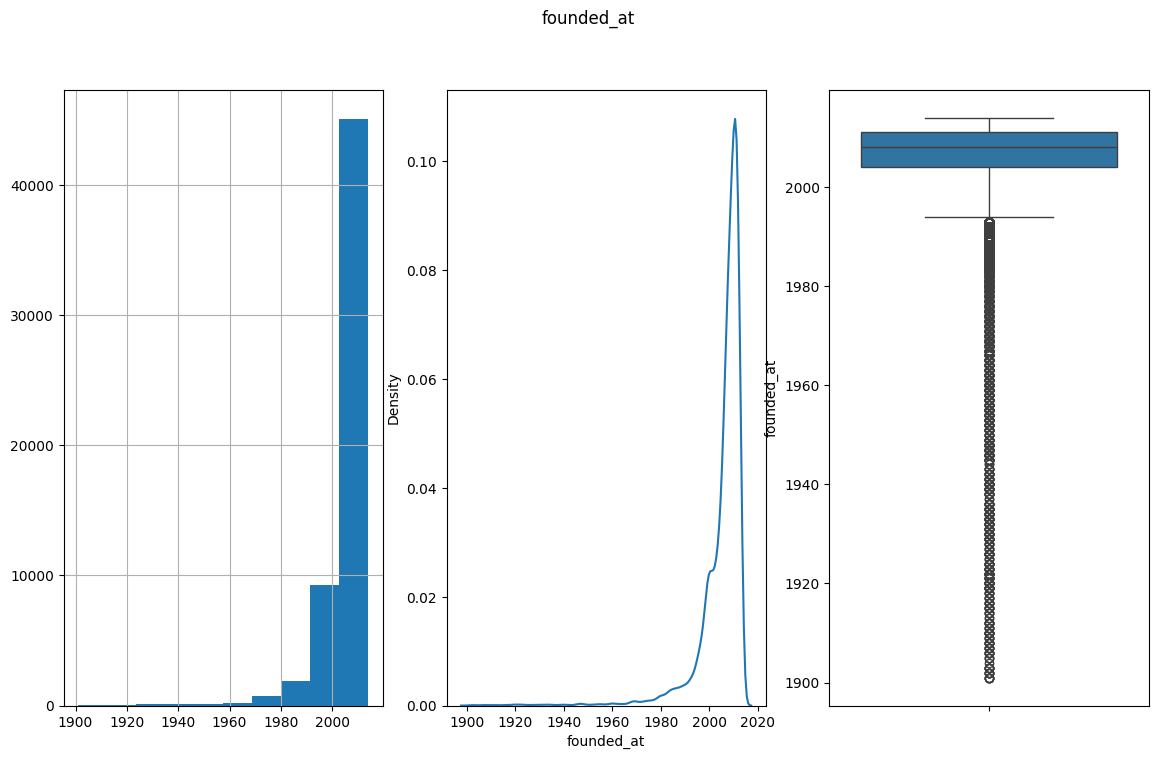

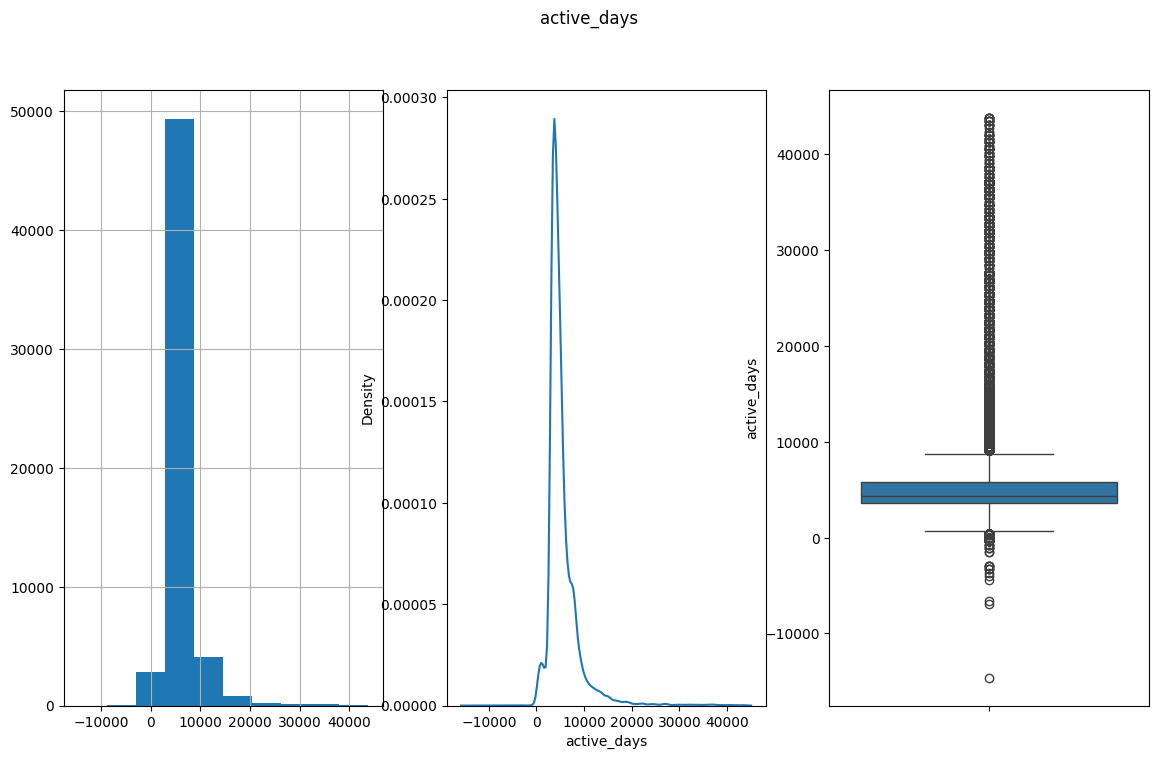

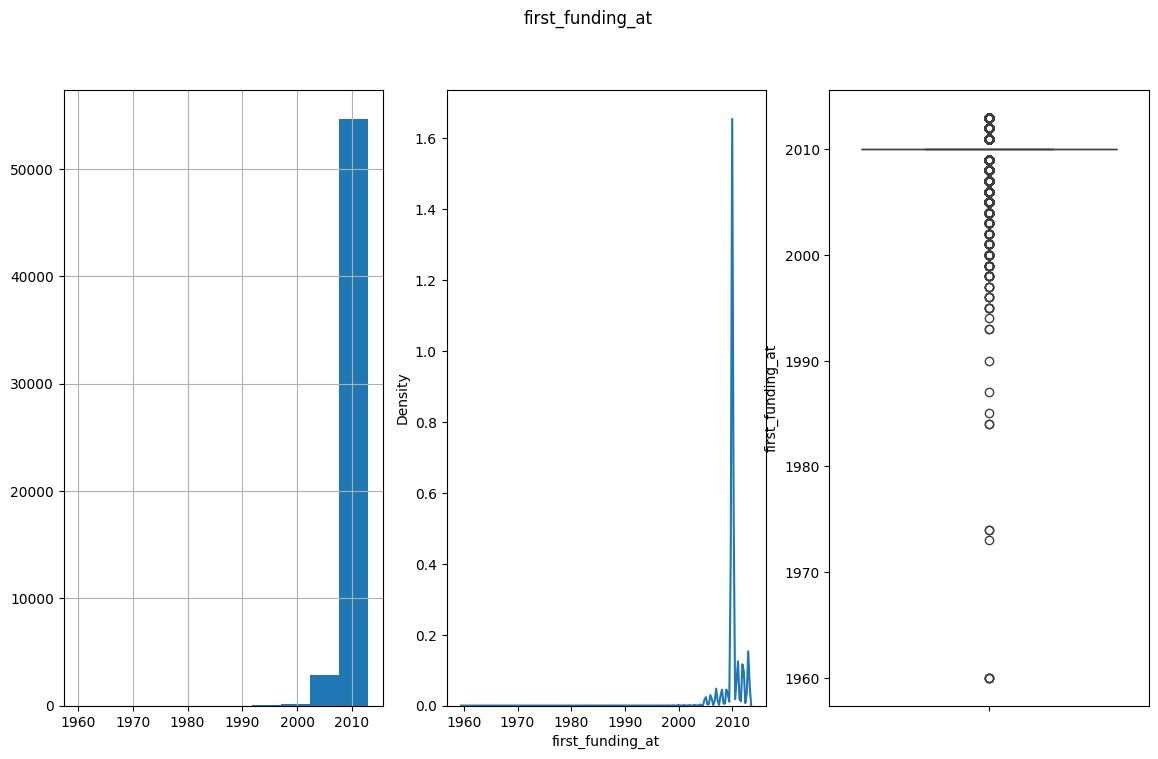

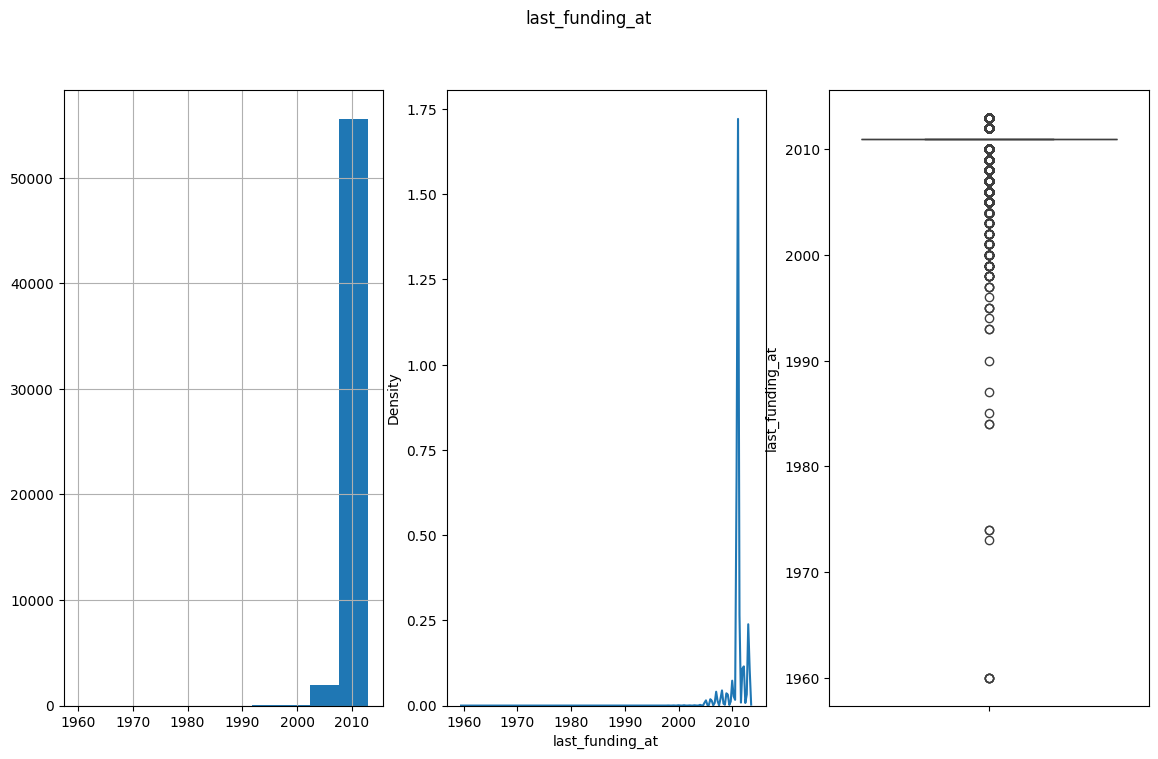

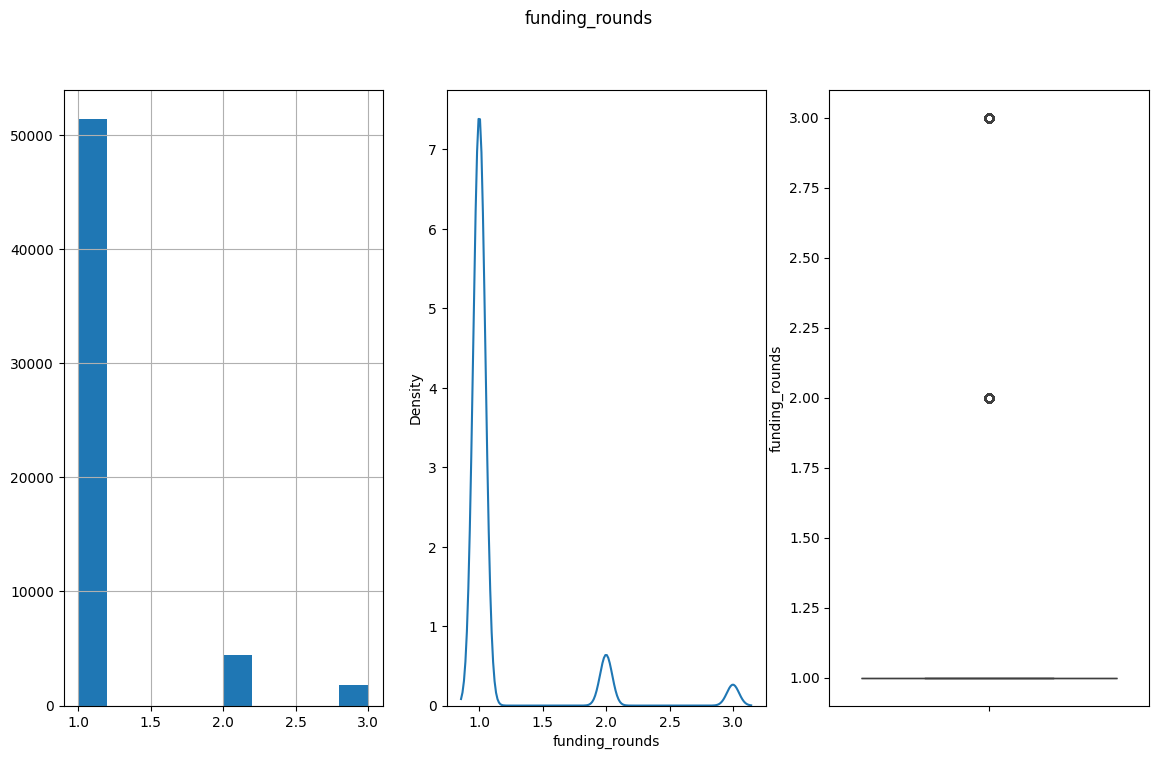

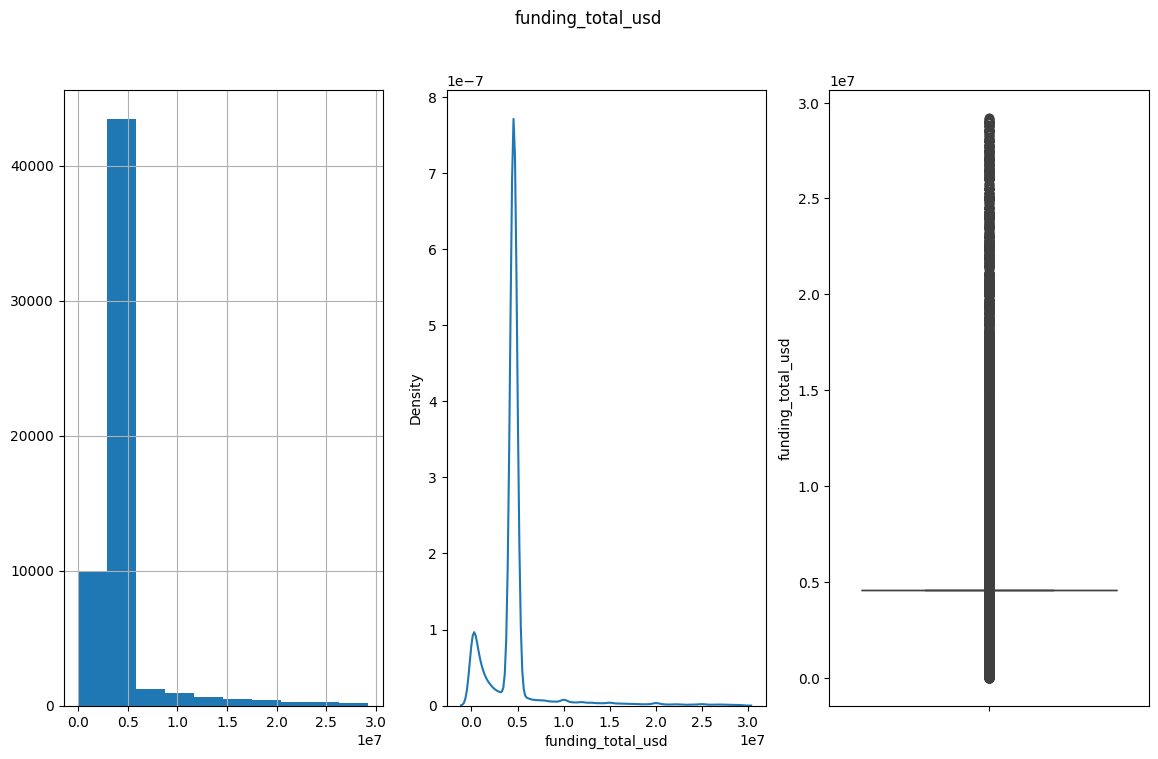

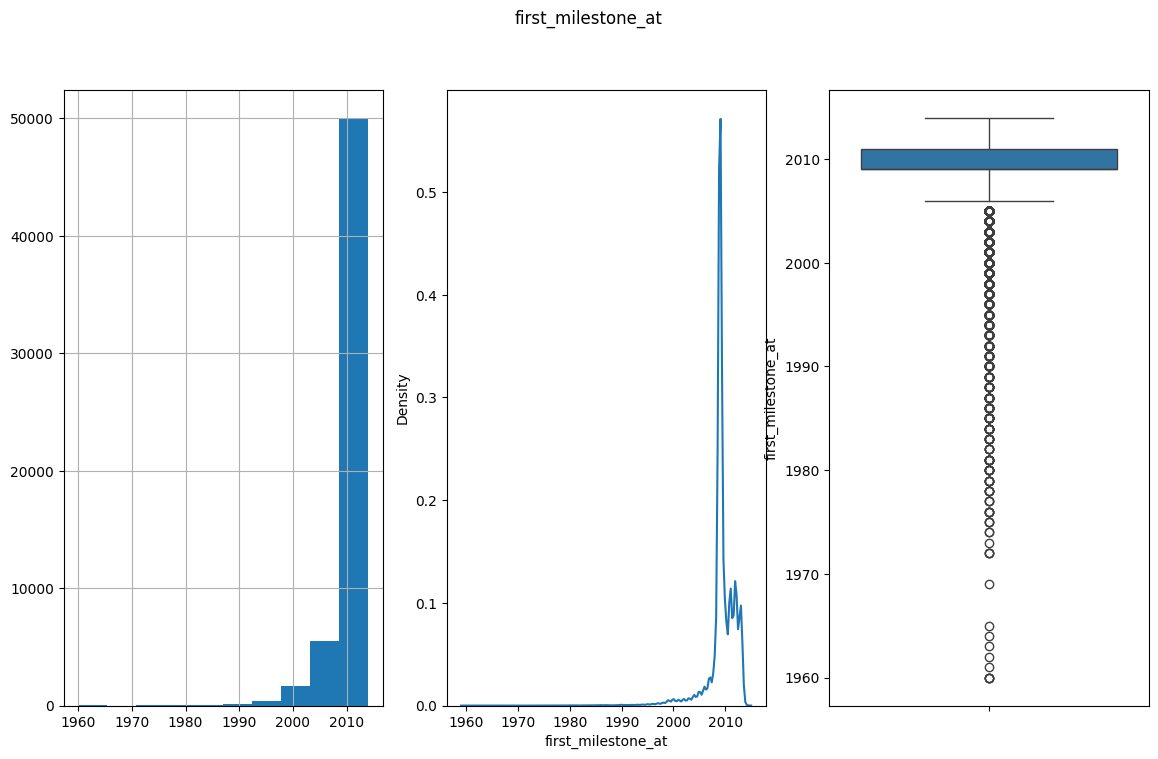

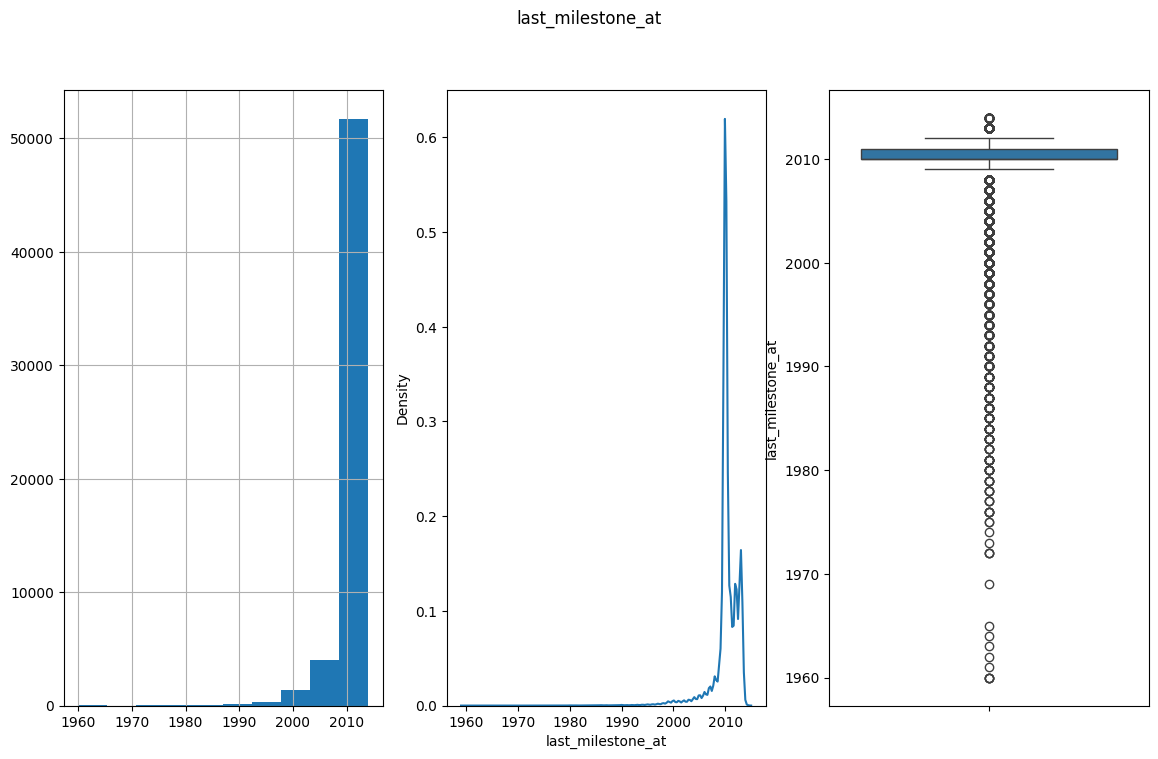

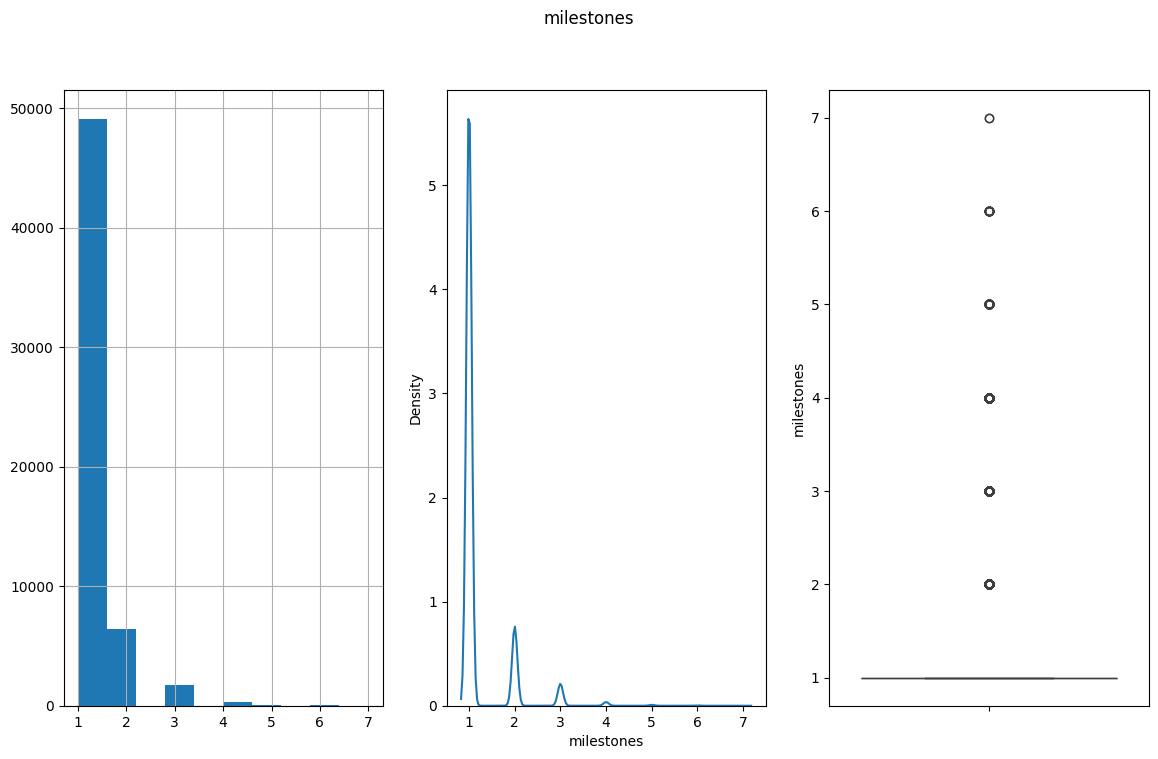

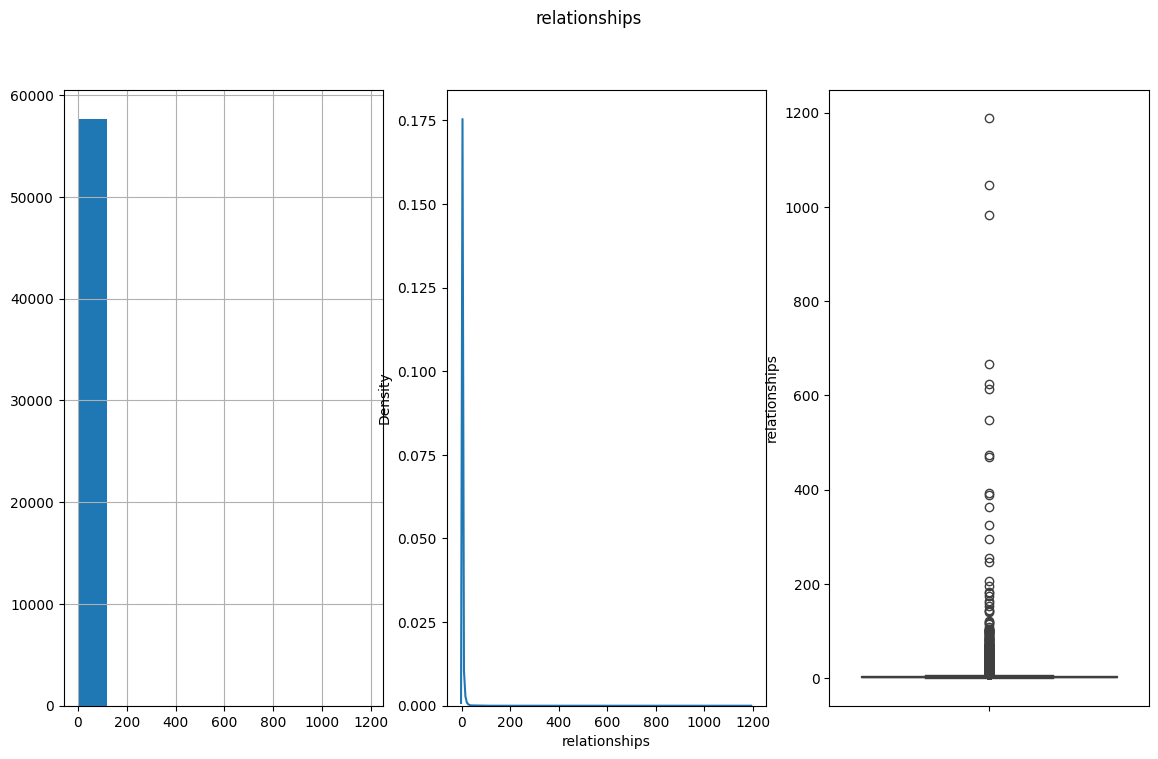

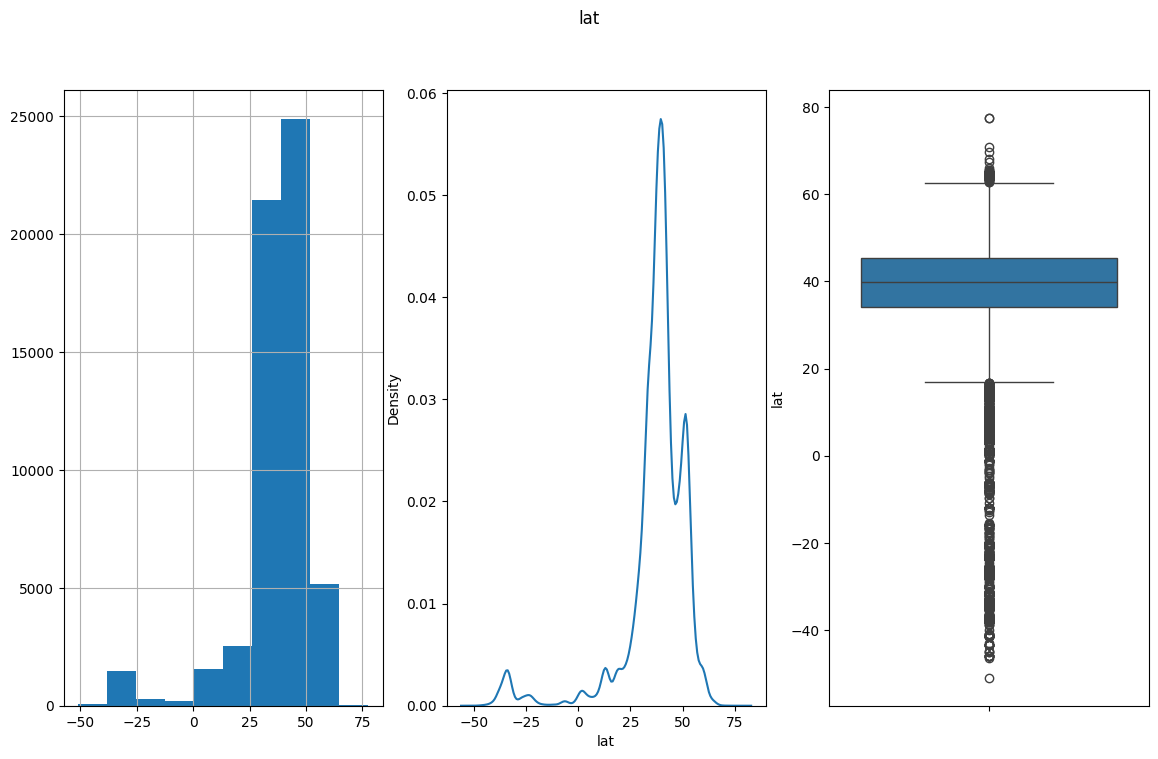

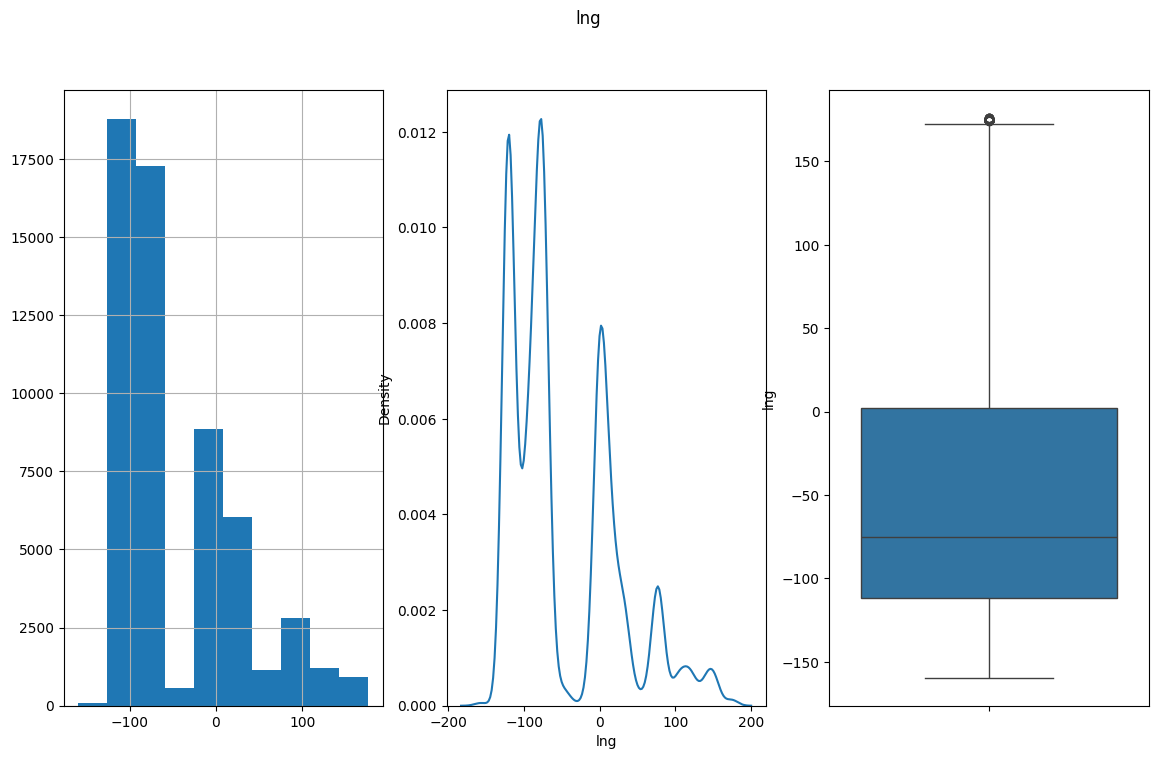

In [ ]:
# Displaying histogram, kernel density plot and boxplot for each numerical feature

for col in num_feat:
    plt.figure(figsize = (14,8))
    plt.suptitle(col)
    plt.subplot(1,3,1)
    df_company[col].hist()
    plt.subplot(1,3,2)
    sns.kdeplot(df_company[col])
    plt.subplot(1,3,3)
    sns.boxplot(y = col, data = df_company)

In [ ]:
# using z_score to identify outliers
z_scores = pd.DataFrame(stats.zscore(df_company[["founded_at","first_funding_at","last_funding_at","first_milestone_at","last_milestone_at","relationships","funding_total_usd","lat"]]),columns = ["founded_at","first_funding_at","last_funding_at","first_milestone_at","last_milestone_at","relationships","funding_total_usd","lat"])
abs(z_scores)

founded_at  first_funding_at  last_funding_at  first_milestone_at  \
0        0.156477          0.058299         0.034289            0.088101   
1        0.257832          0.058299         0.034289            0.088101   
2        0.257832          0.058299         0.034289            0.417182   
3        0.156477          1.355392         2.032315            0.417182   
4        0.257832          0.058299         0.034289            0.417182   
...           ...               ...              ...                 ...   
57653    0.156477          0.058299         0.034289            1.228226   
57654    0.156477          1.355392         2.032315            1.228226   
57655    4.708576          0.058299         0.034289            0.899144   
57656    0.257832          0.058299         0.034289            0.088101   
57657    0.156477          1.355392         2.032315            1.075345   

       last_milestone_at  relationships  funding_total_usd       lat  
0               0.012928       0.168758       2.309312e-08  0.420723  
1               0.012928       0.005641       2.309312e-08  0.924693  
2               0.694917       0.168758       2.309312e-08  0.094332  
3               0.669060       0.877639       1.227494e-01  0.011114  
4               0.694917       0.081559       2.309312e-08  0.256207  
...                  ...            ...                ...       ...  
57653           1.010055       0.092841       2.309312e-08  0.035248  
57654           1.010055       0.877639       1.142089e+00  0.008144  
57655           1.010055       3.493631       2.309312e-08  0.103974  
57656           0.012928       0.255958       2.309312e-08  0.195785  
57657           0.694917       0.255958       1.223932e+00  0.196816  

[57658 rows x 8 columns]

In [ ]:
df_company[(abs(z_scores)>3).any(axis = 1)]

category_code     status  founded_at  active_days country_code  \
5            mobile   acquired        2008         1827          USA   
9            mobile  operating        2003         6575          AUS   
14      advertising  operating        2004         6210          AUS   
52         software  operating        1978        15706          USA   
58         software  operating        1999         8036          USA   
...             ...        ...         ...          ...          ...   
57617      software  operating        1998         8401        other   
57628           web     closed        2002         3287          USA   
57632         other  operating        1952        25203          USA   
57641    enterprise   acquired        2003         2922          USA   
57655    consulting  operating        1959        22646          USA   

       first_funding_at  last_funding_at  funding_rounds  funding_total_usd  \
5                2008.0           2008.0             1.0          4587548.0   
9                2003.0           2003.0             1.0           250000.0   
14               2010.0           2011.0             1.0          4587548.0   
52               2010.0           2011.0             1.0          4587548.0   
58               2010.0           2011.0             1.0          4587548.0   
...                 ...              ...             ...                ...   
57617            2006.0           2006.0             1.0          1200000.0   
57628            2006.0           2006.0             1.0           400000.0   
57632            2010.0           2011.0             1.0          4587548.0   
57641            2006.0           2006.0             1.0         14500000.0   
57655            2010.0           2011.0             1.0          4587548.0   

       first_milestone_at  last_milestone_at  milestones  relationships  \
5                  1995.0             2012.0         4.0            9.0   
9                  2007.0             2007.0         1.0            2.0   
14                 2004.0             2004.0         1.0            1.0   
52                 2000.0             2000.0         1.0            4.0   
58                 1999.0             1999.0         1.0            3.0   
...                   ...                ...         ...            ...   
57617              2009.0             2010.0         1.0            1.0   
57628              2009.0             2010.0         1.0            1.0   
57632              2012.0             2012.0         1.0           27.0   
57641              2006.0             2010.0         3.0           19.0   
57655              2012.0             2013.0         3.0           44.0   

             lat         lng  isClosed  
5      37.441883 -122.143019         1  
9     -27.469771  153.025124         0  
14    -35.296256  139.038277         0  
52     34.038078  -84.581572         0  
58     31.808768  -85.969951         0  
...          ...         ...       ...  
57617 -36.854065  174.779879         0  
57628  39.739236 -104.990251         1  
57632  47.751074 -120.740139         0  
57641  37.441883 -122.143019         1  
57655  38.882334  -77.171091         0  

[6953 rows x 16 columns]

In [ ]:
# retrieving dataset without outliers
df_company = df_company[(abs(z_scores)<3).all(axis = 1)]

In [ ]:
# Deleting negative values in active_days
df_company = df_company[df_company["active_days"]>0]

In [ ]:
df_company

category_code     status  founded_at  active_days country_code  \
0           advertising  operating        2007         5114        other   
1                 other  operating        2008         4749          IND   
2           advertising  operating        2008         4749          USA   
3                   web   acquired        2007         2192          USA   
4           games_video  operating        2008         4749          USA   
...                 ...        ...         ...          ...          ...   
57652          software  operating        2004         6210          USA   
57653         ecommerce  operating        2007         5114          USA   
57654  public_relations  operating        2007         5114          USA   
57656             other  operating        2008         4749          USA   
57657         ecommerce  operating        2007         5114          USA   

       first_funding_at  last_funding_at  funding_rounds  funding_total_usd  \
0                2010.0           2011.0             1.0          4587548.0   
1                2010.0           2011.0             1.0          4587548.0   
2                2010.0           2011.0             1.0          4587548.0   
3                2008.0           2008.0             1.0          5000000.0   
4                2010.0           2011.0             1.0          4587548.0   
...                 ...              ...             ...                ...   
57652            2010.0           2011.0             1.0          4587548.0   
57653            2010.0           2011.0             1.0          4587548.0   
57654            2008.0           2008.0             1.0           750000.0   
57656            2010.0           2011.0             1.0          4587548.0   
57657            2008.0           2008.0             1.0           475000.0   

       first_milestone_at  last_milestone_at  milestones  relationships  \
0                  2009.0             2010.0         1.0            2.0   
1                  2009.0             2010.0         1.0            4.0   
2                  2008.0             2008.0         1.0            2.0   
3                  2008.0             2012.0         3.0           14.0   
4                  2008.0             2008.0         1.0            3.0   
...                   ...                ...         ...            ...   
57652              2009.0             2010.0         1.0            4.0   
57653              2013.0             2013.0         2.0            5.0   
57654              2013.0             2013.0         1.0           14.0   
57656              2009.0             2010.0         1.0            1.0   
57657              2006.0             2008.0         2.0            1.0   

             lat         lng  isClosed  
0      30.427755   -9.598107         0  
1      22.307159   73.181219         0  
2      35.686975 -105.937799         0  
3      37.386052 -122.083851         1  
4      33.078655 -116.601964         0  
...          ...         ...       ...  
57652  40.748350  -74.323219         0  
57653  37.774929 -122.419415         0  
57654  37.338208 -121.886329         0  
57656  34.052234 -118.243685         0  
57657  34.035633 -118.515590         0  

[50639 rows x 16 columns]

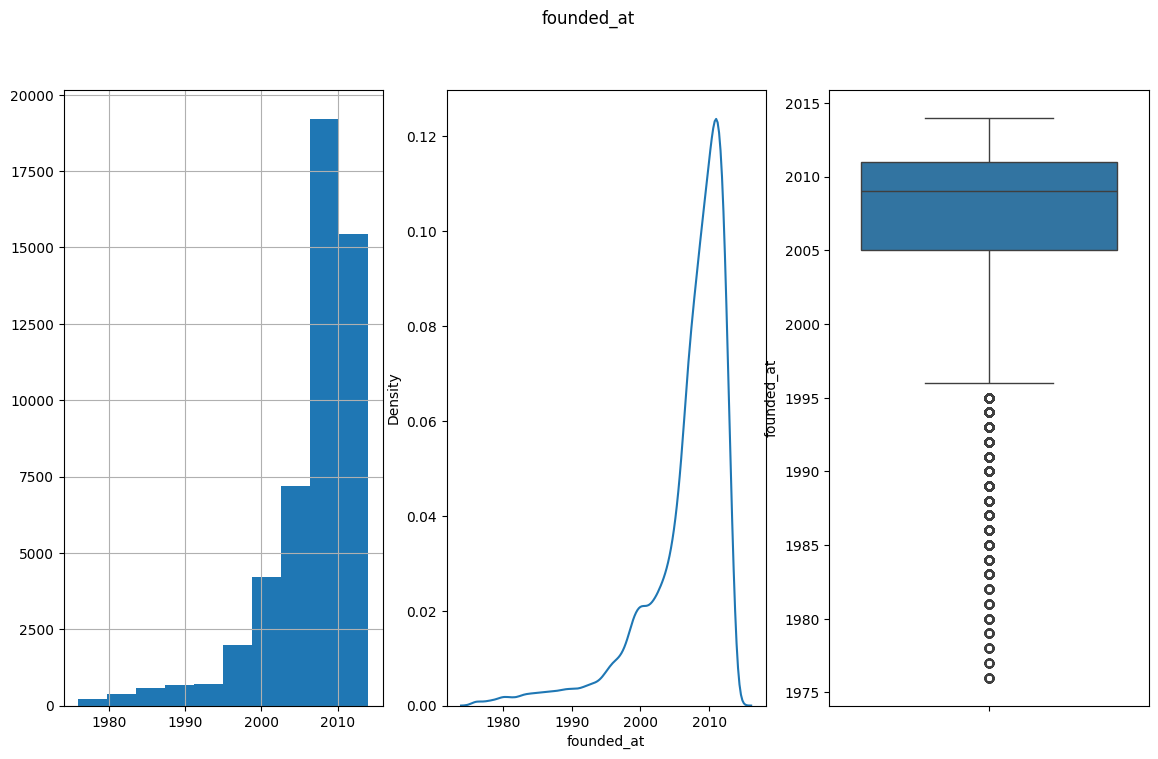

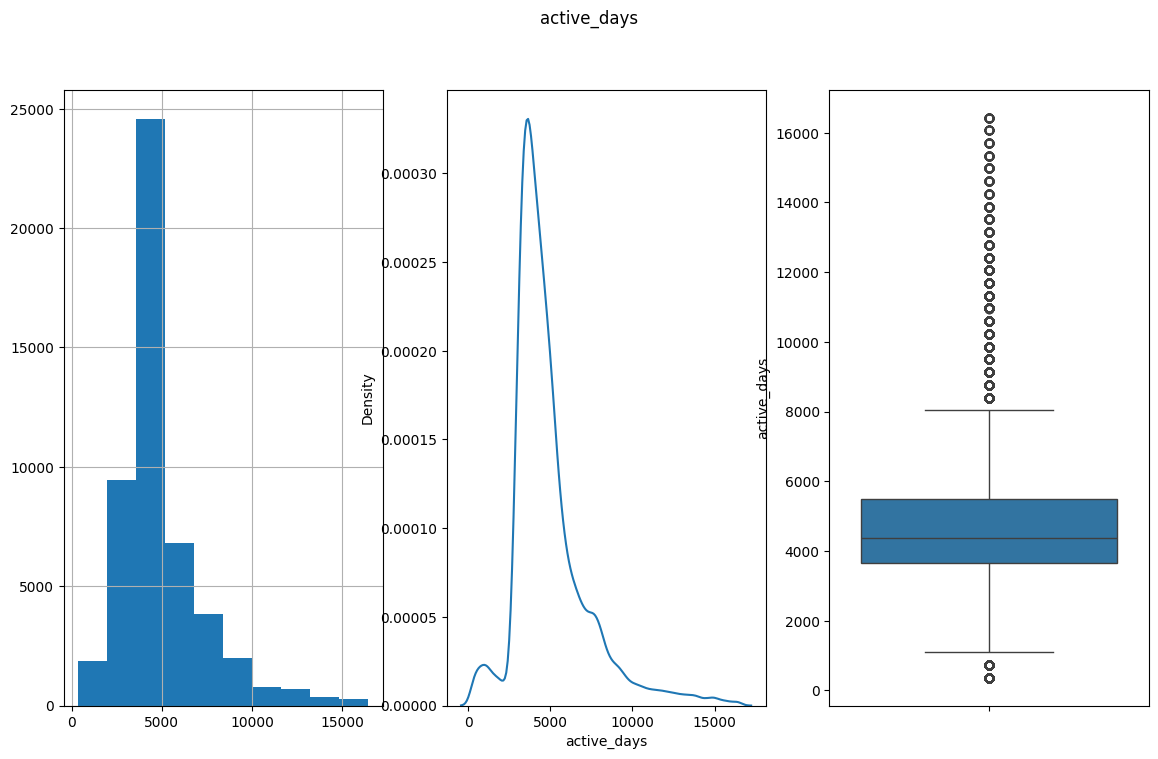

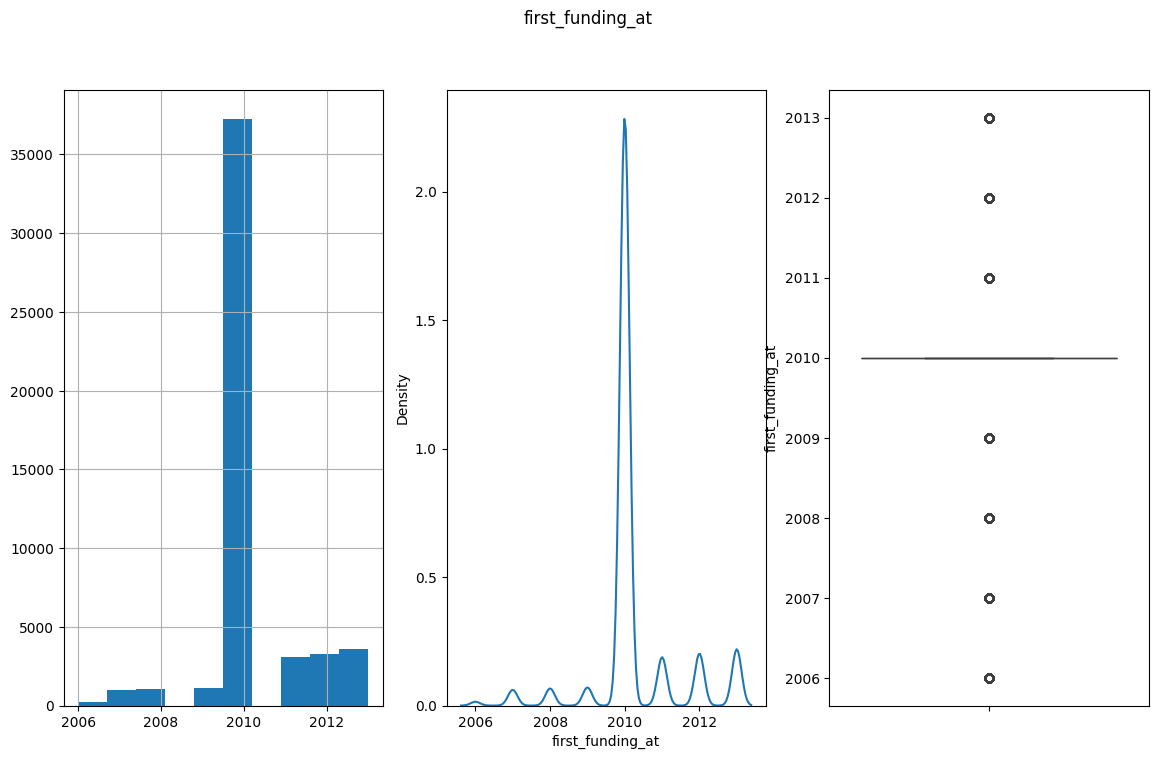

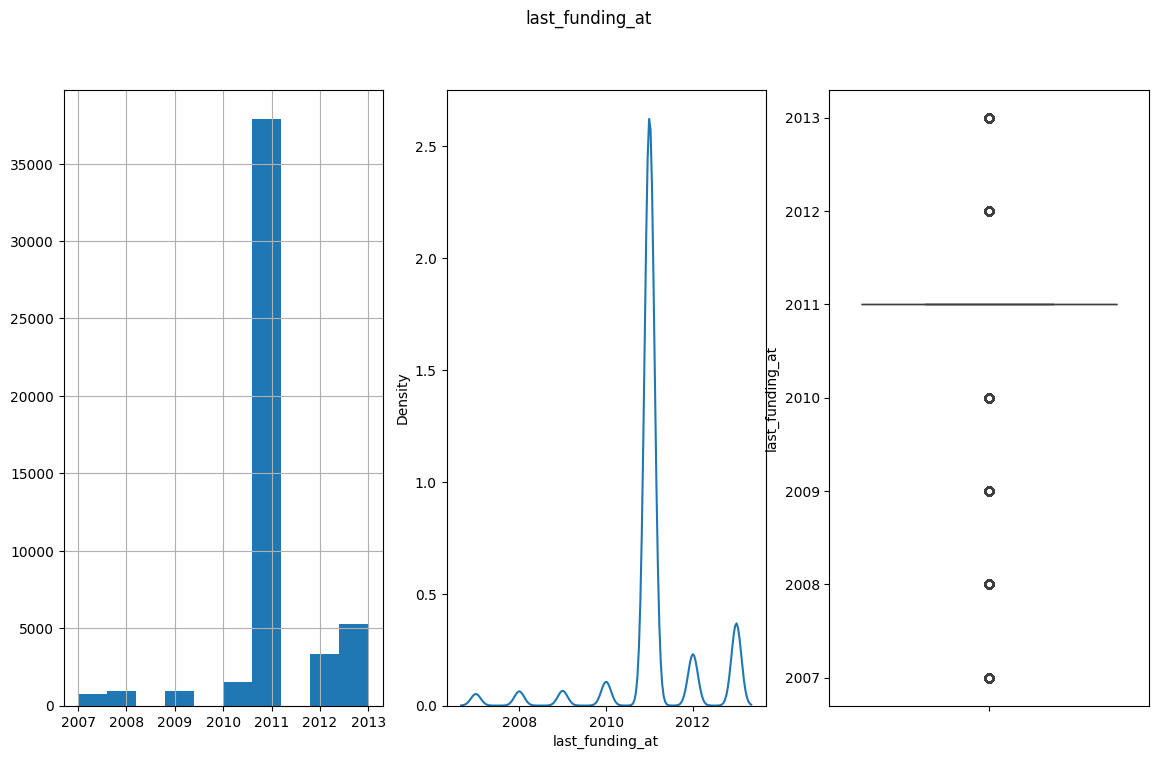

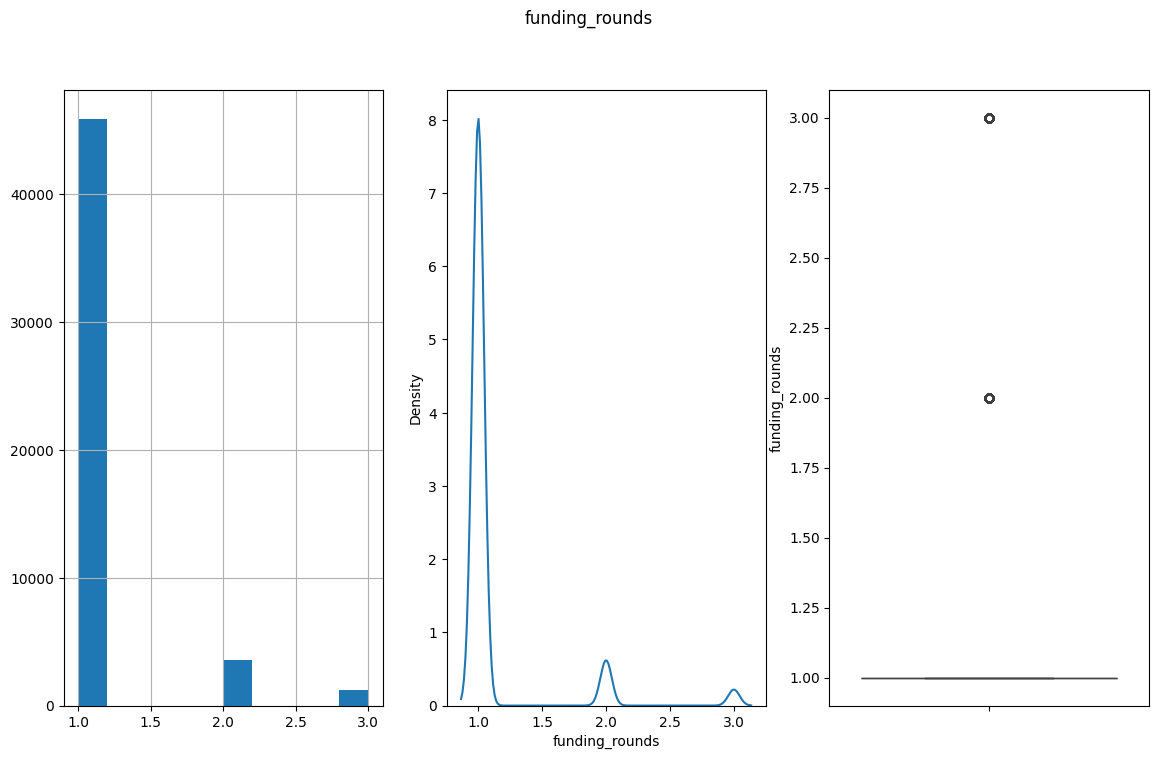

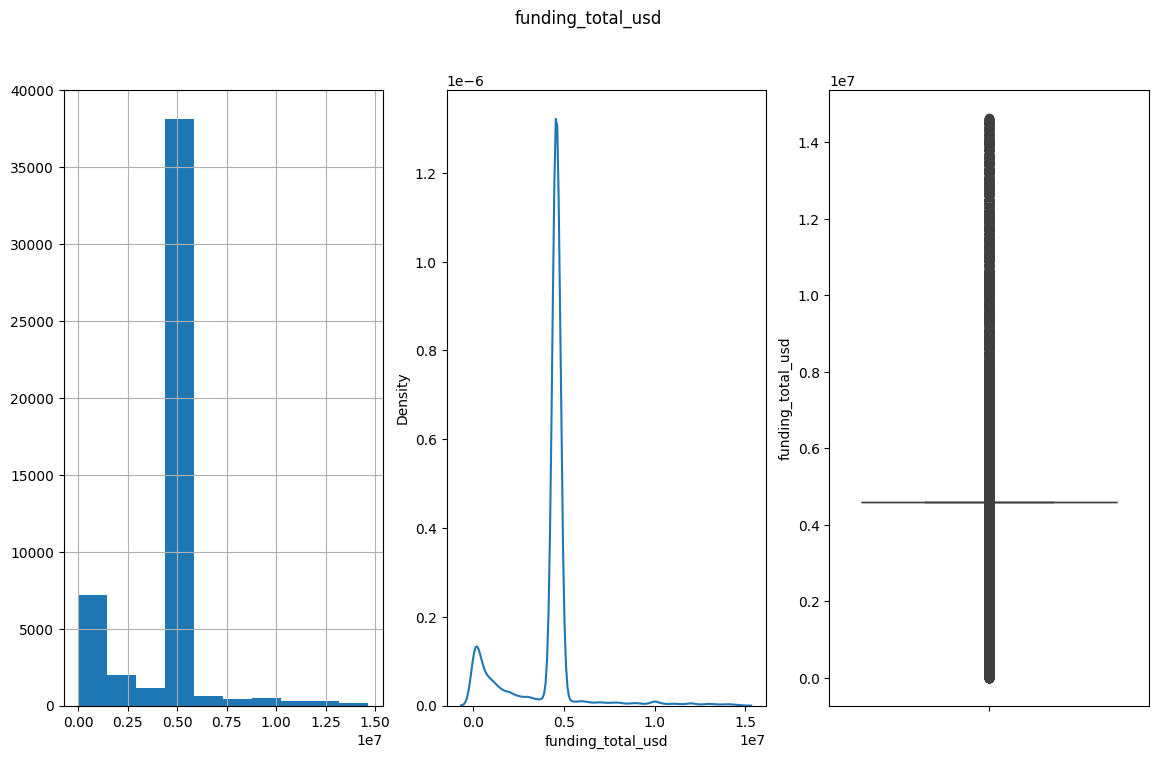

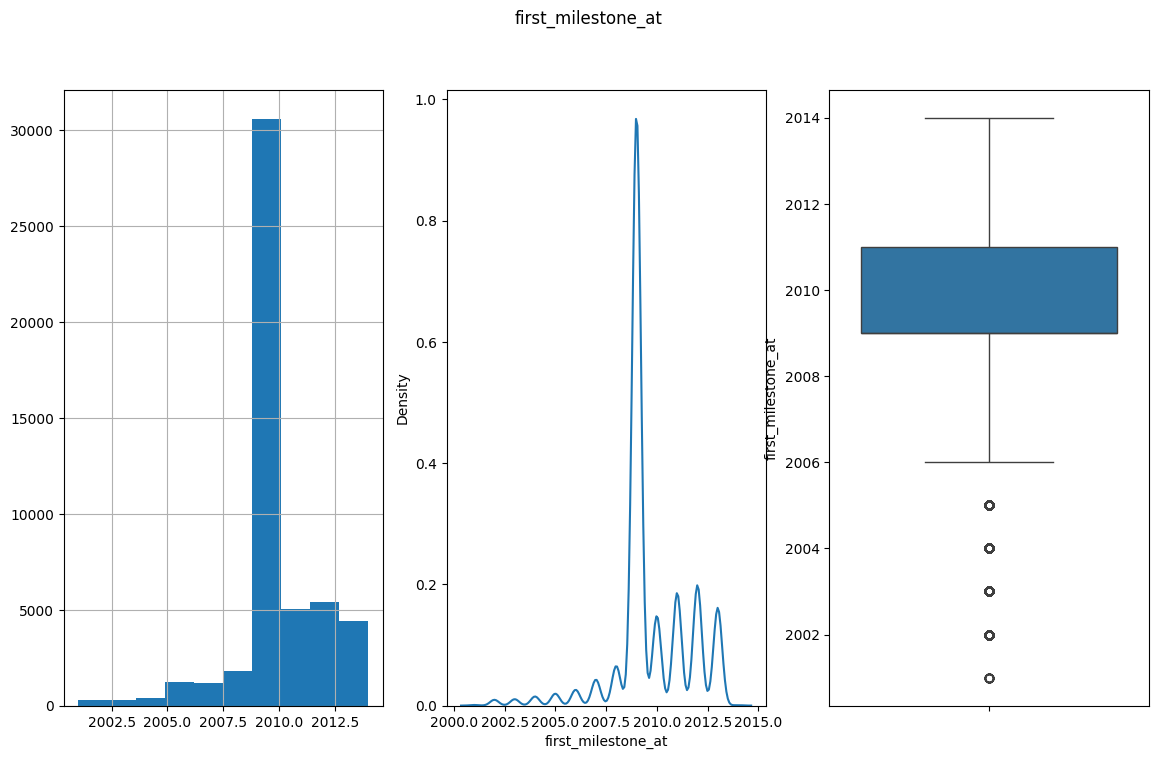

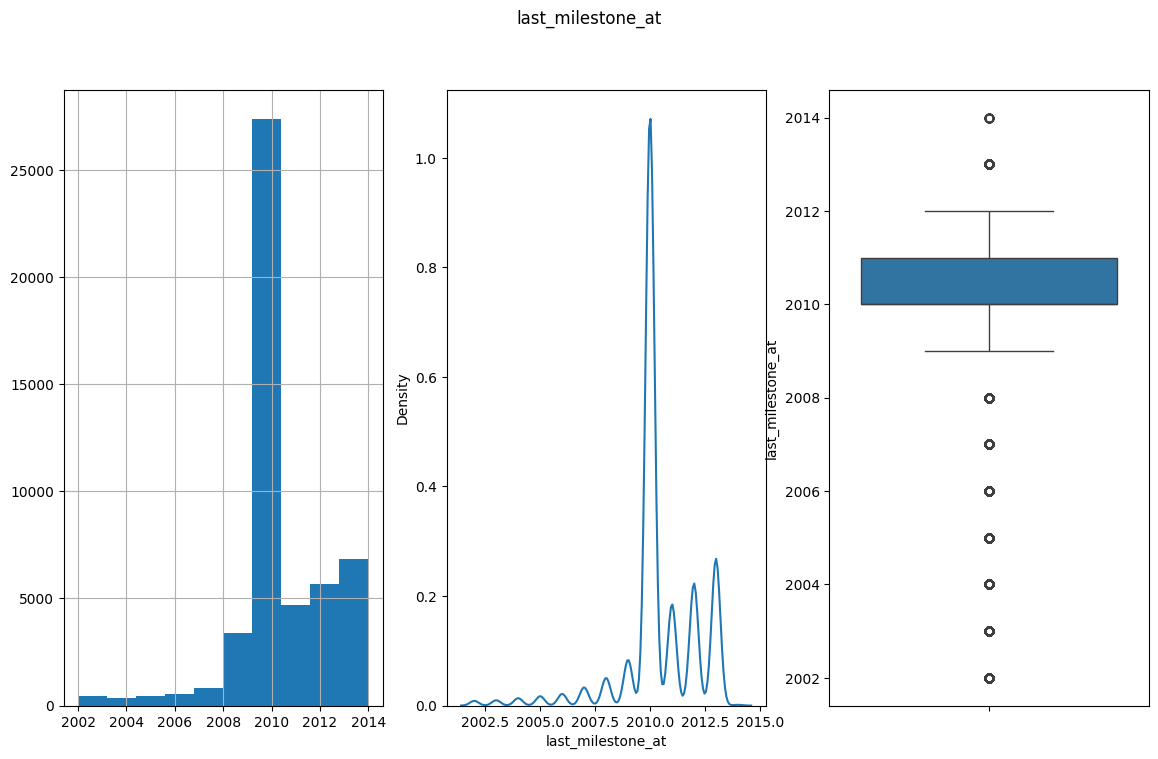

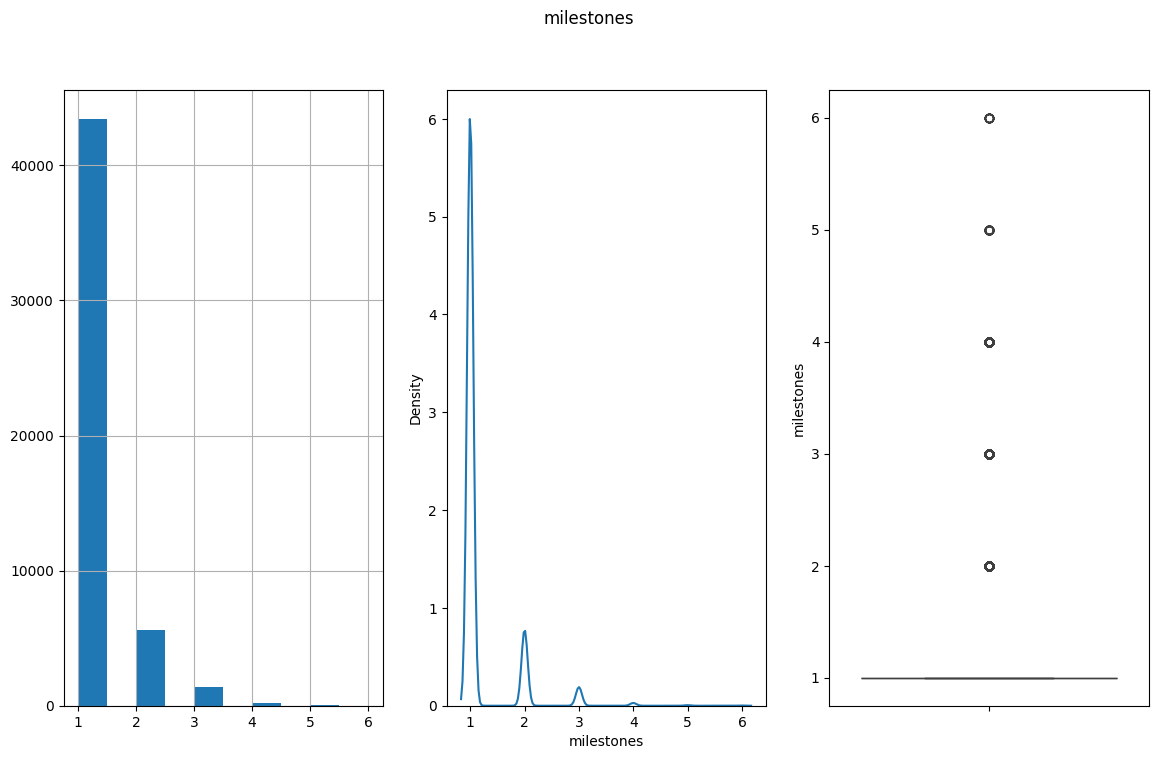

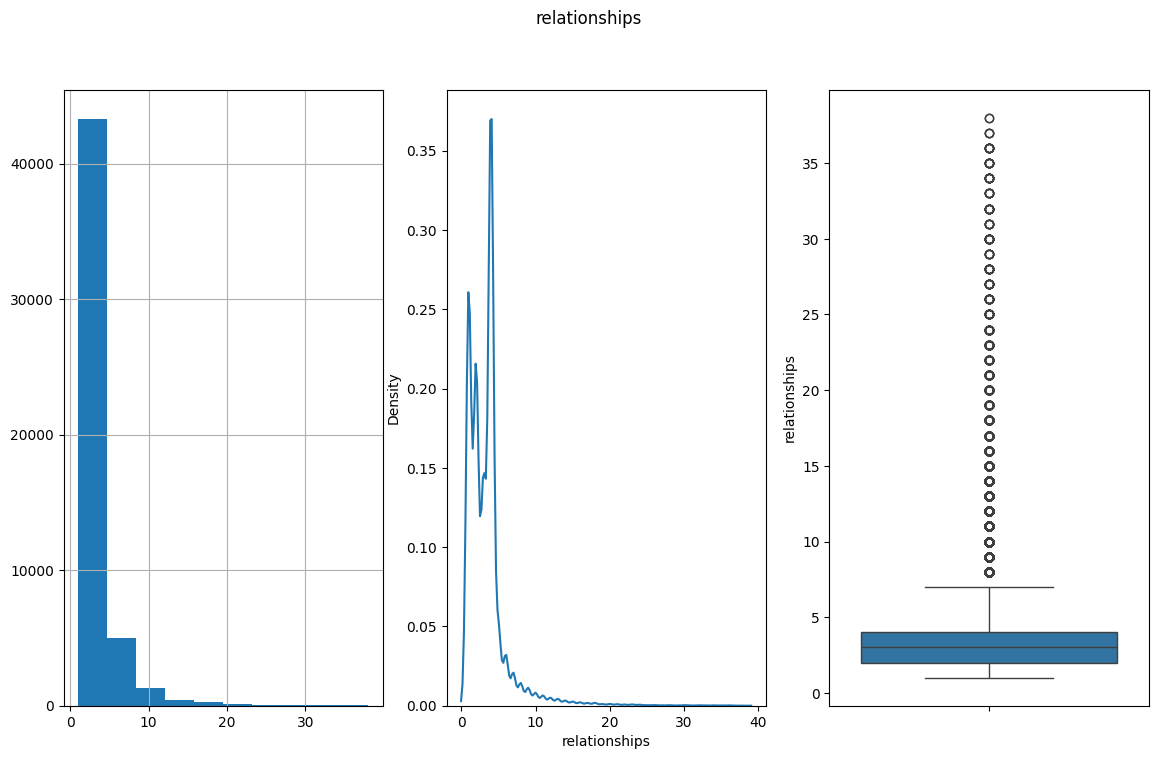

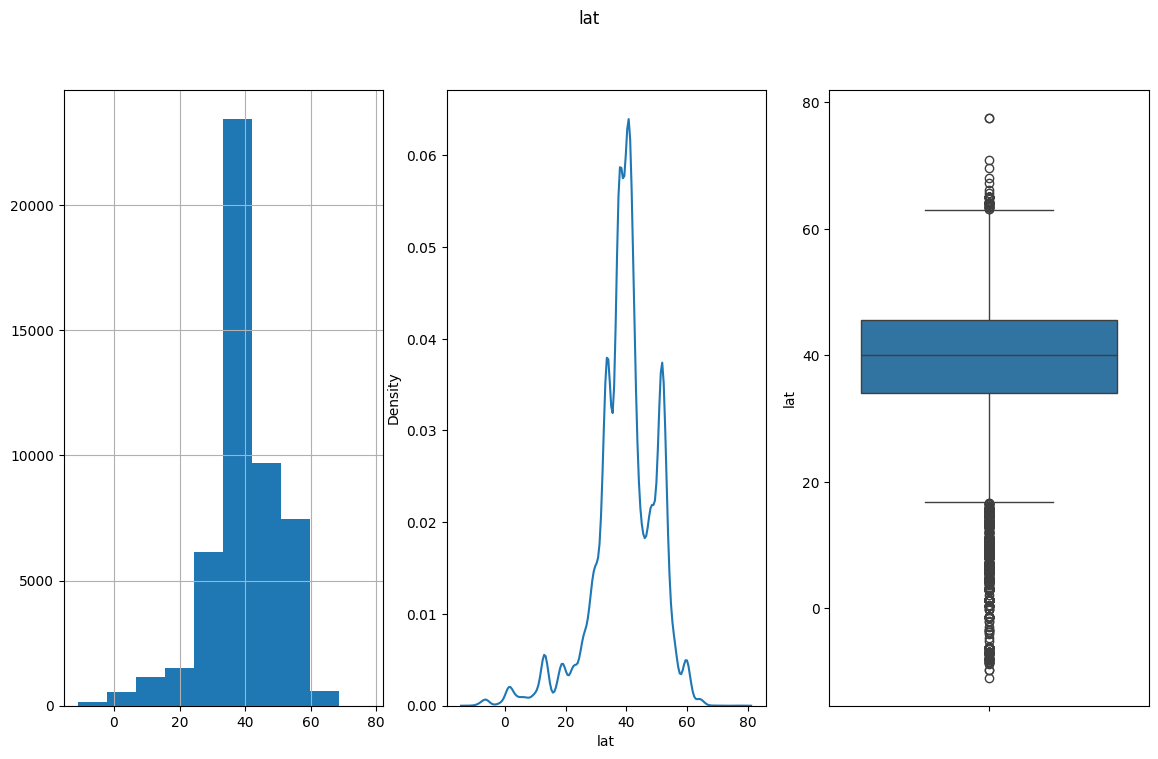

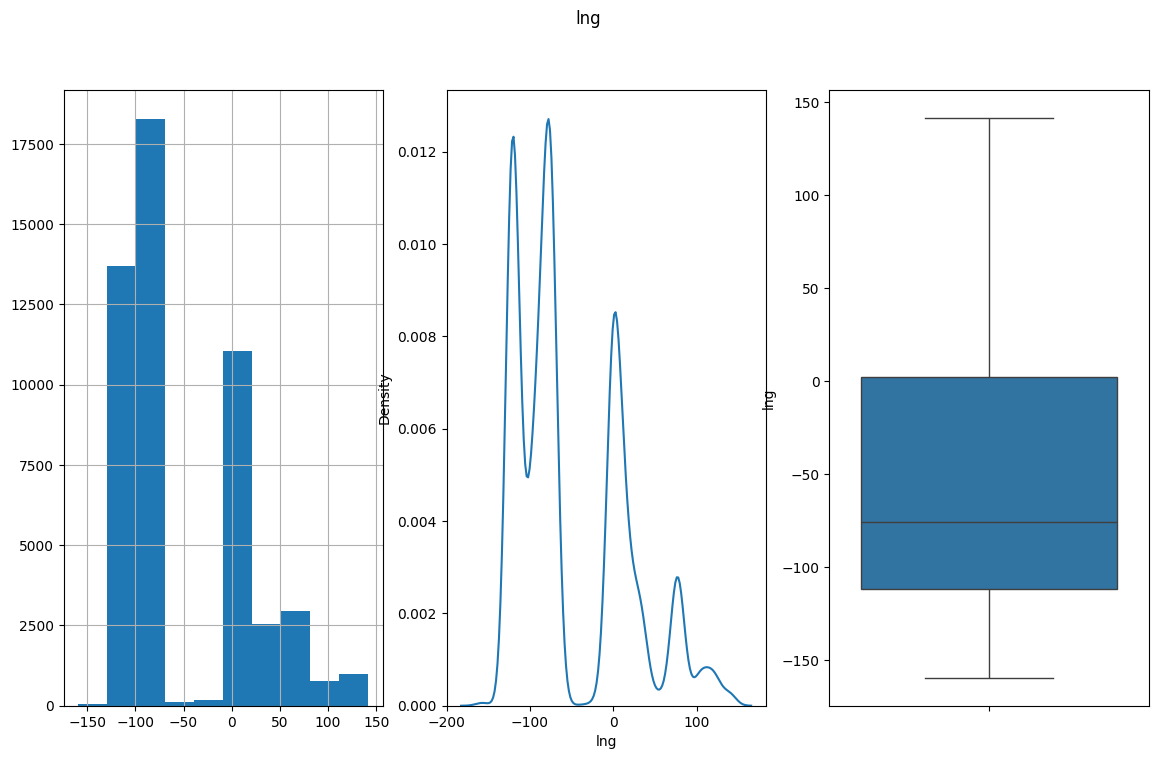

In [ ]:
# Displaying histogram, kernel density plot and boxplot for each numerical feature

for col in num_feat:
    plt.figure(figsize = (14,8))
    plt.suptitle(col)
    plt.subplot(1,3,1)
    df_company[col].hist()
    plt.subplot(1,3,2)
    sns.kdeplot(df_company[col])
    plt.subplot(1,3,3)
    sns.boxplot(y = col, data = df_company)

## 1) b) Univariate analysis/Categorical features

#### Category code

<ipython-input-15-ceaaec6902f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_company, x = "category_code", palette = "viridis")


<Axes: xlabel='category_code', ylabel='count'>

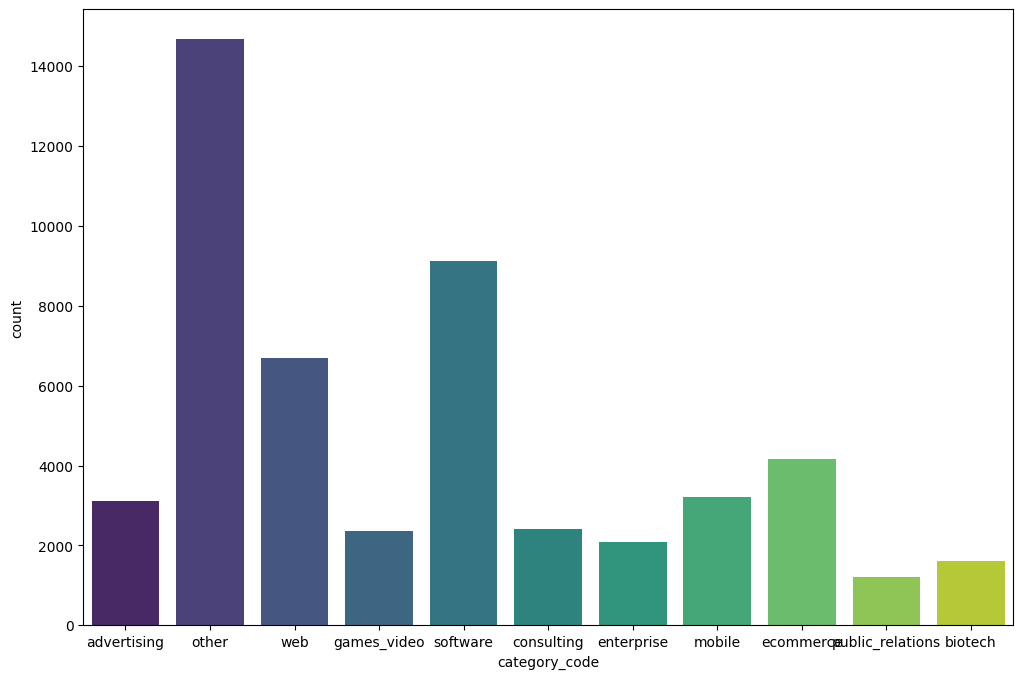

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(data = df_company, x = "category_code", palette = "viridis")

#### Country code

<ipython-input-16-75cc0702554a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_company, x = "country_code", palette = "viridis")


<Axes: xlabel='country_code', ylabel='count'>

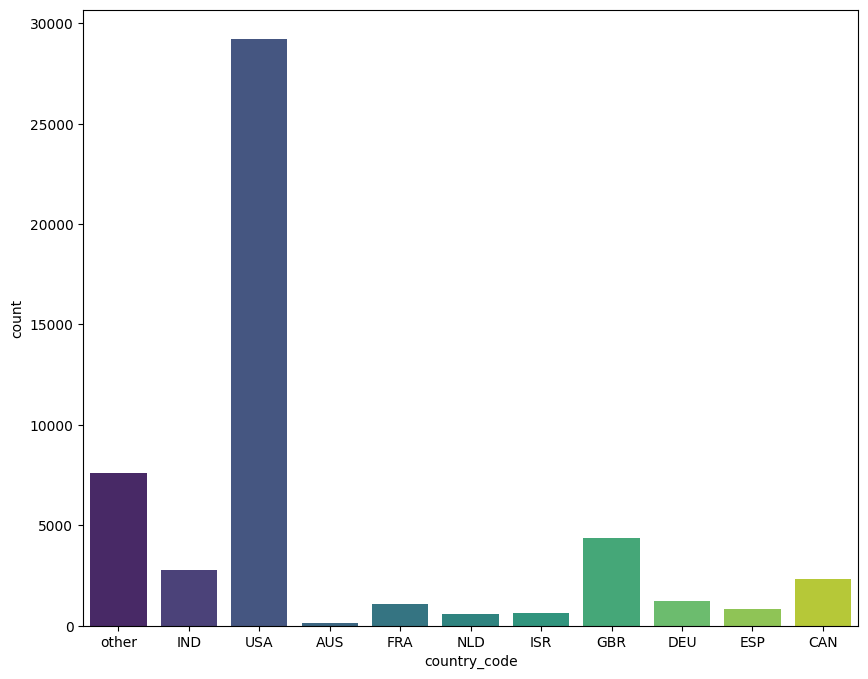

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df_company, x = "country_code", palette = "viridis")

#### IsClosed

In [ ]:
df_company.isClosed.value_counts()

isClosed
0    46946
1     3693
Name: count, dtype: int64

<Axes: xlabel='isClosed'>

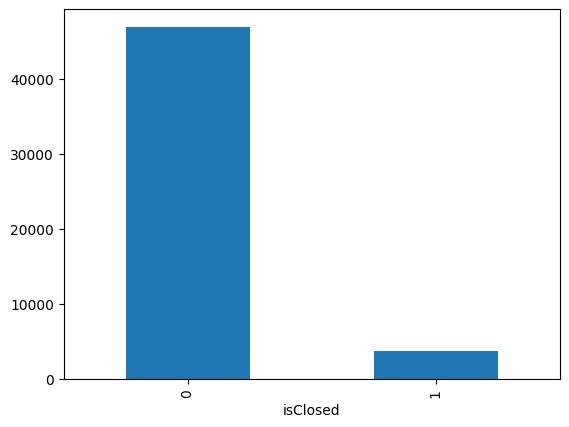

In [ ]:
df_company.isClosed.value_counts().plot(kind = 'bar')

## 2) a) Bivariate analysis/Numerical - Numerical relationships

<Figure size 1200x1000 with 0 Axes>

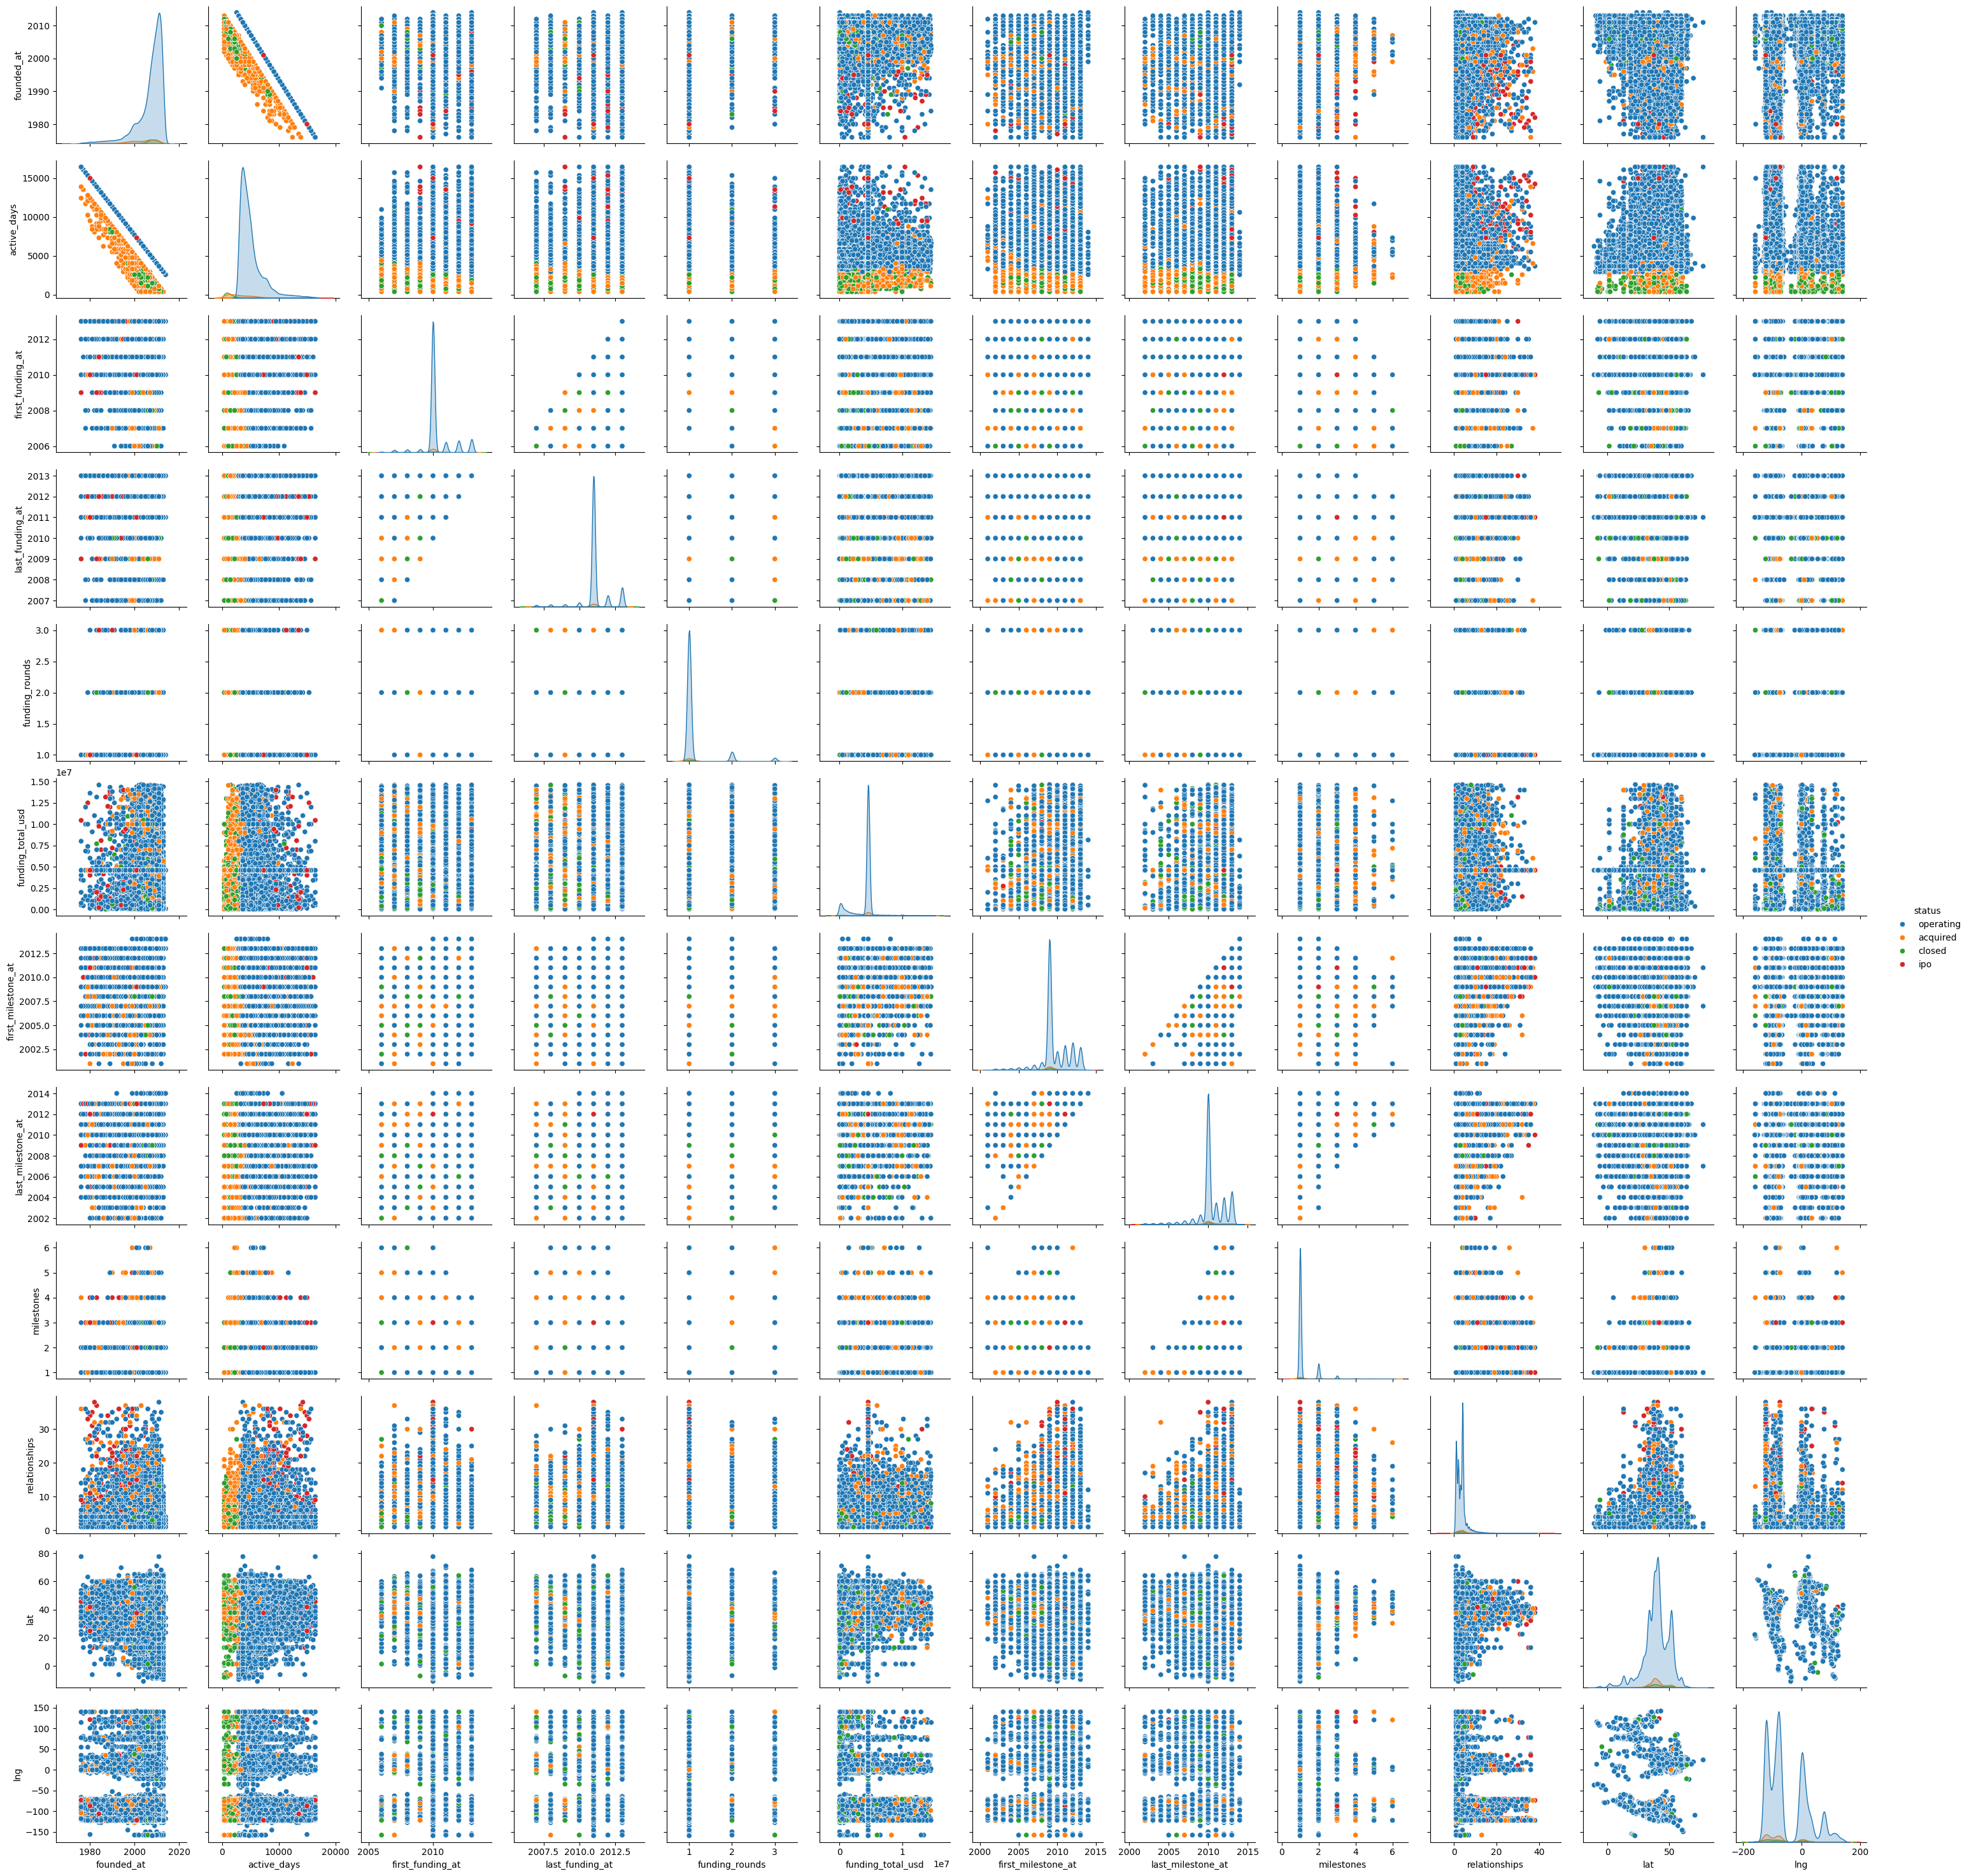

In [ ]:
plt.figure(figsize = (12,10))
sns.pairplot(df_company[num_feat+["status"]], hue = "status")

<Axes: >

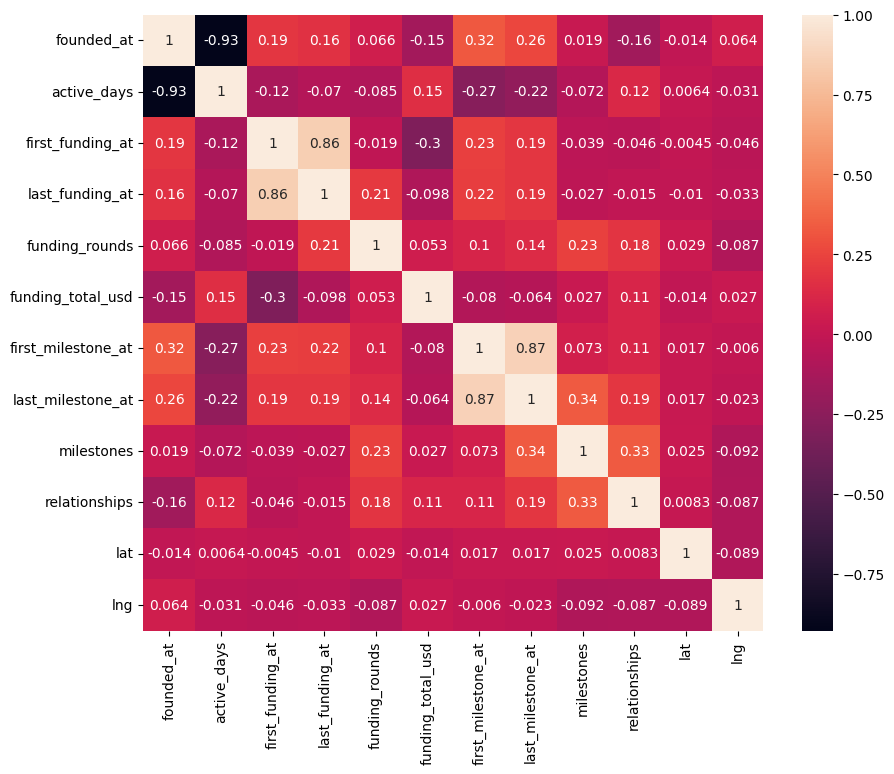

In [ ]:
# Pearson correlation matrix for numerical features
plt.figure(figsize = (10,8))
sns.heatmap(df_company[num_feat].corr(method = "pearson"), annot = True)

<Axes: >

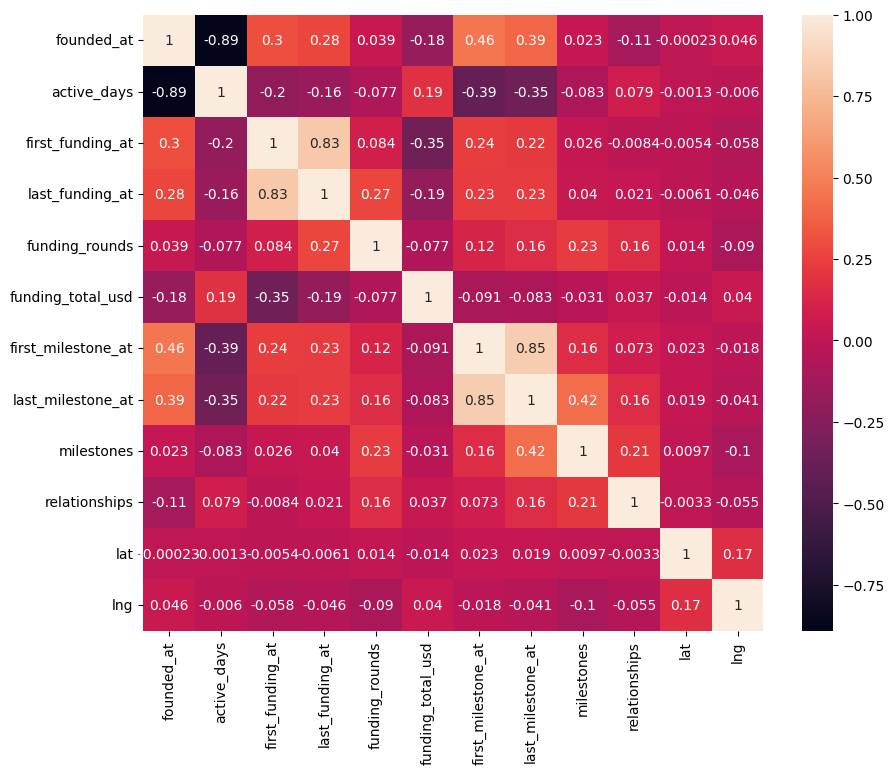

In [ ]:
# Spearman correlation matrix for numerical features
plt.figure(figsize = (10,8))
sns.heatmap(df_company[num_feat].corr(method = "spearman"), annot = True)

## 2) a) Bivariate analysis/Categorical - Categorical relationships

In [ ]:
# Contingency table with stacked bar plots for category code and country code
pd.crosstab(df_company["category_code"],df_company["country_code"])

country_code      AUS  CAN  DEU  ESP  FRA   GBR  IND  ISR  NLD   USA  other
category_code                                                              
advertising        11  153   57   38   58   275  139   59   39  1851    436
biotech             1   58   35   10   29    68   21   24    7  1250    109
consulting          7  104   41   42   48   228  178   11   22  1380    342
ecommerce           7  143  141  109   96   414  366   37   55  2017    767
enterprise          7  124   42   23   56   155   75   28   28  1253    284
games_video         5  114   75   51   64   196   62   44   32  1304    425
mobile              3  159  113   58   73   264   95   64   45  1775    574
other              46  597  329  235  237  1310  749  165  159  8759   2090
public_relations    0   72   28   23   24   144   37   15   27   658    190
software           15  477  207  130  210   689  726  109  101  4978   1469
web                15  324  151   82  164   614  299   60   73  3992    907

<Axes: xlabel='category_code'>

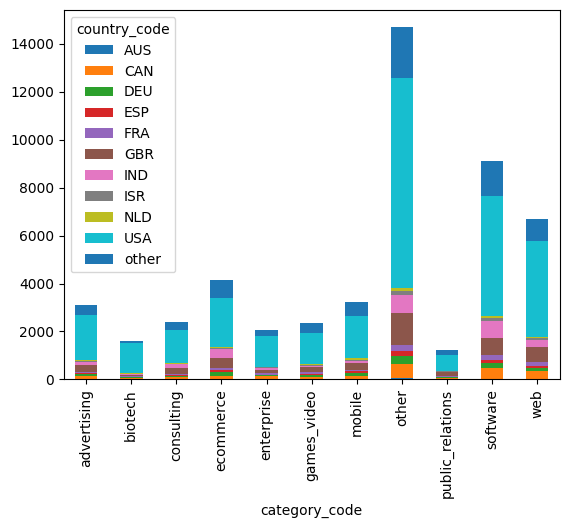

In [ ]:
# Visualization of contingency table with stacked bar plots for category code and country code
pd.crosstab(df_company["category_code"],df_company["country_code"]).plot(kind = "bar", stacked = True)

In [ ]:
# Contingency table with stacked bar plots for category code and isClosed
pd.crosstab(df_company["category_code"],df_company["isClosed"])

isClosed              0    1
category_code               
advertising        2907  209
biotech            1445  167
consulting         2345   58
ecommerce          3943  209
enterprise         1879  196
games_video        2146  226
mobile             2963  260
other             13825  851
public_relations   1129   89
software           8371  740
web                5993  688

<Axes: xlabel='category_code'>

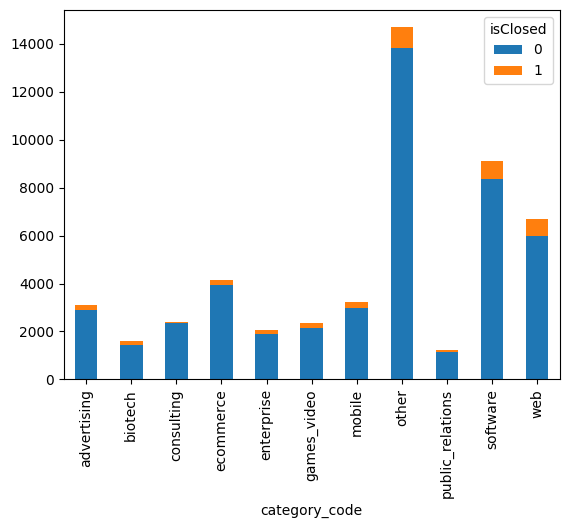

In [ ]:
# Visualization of contingency table with stacked bar plots for category code and isClosed
pd.crosstab(df_company["category_code"],df_company["isClosed"]).plot(kind = "bar", stacked = True)

In [ ]:
# Contingency table with stacked bar plots for country code and isClosed
pd.crosstab(df_company["country_code"],df_company["isClosed"])

isClosed          0     1
country_code             
AUS             114     3
CAN            2172   153
DEU            1137    82
ESP             774    27
FRA            1002    57
GBR            4088   269
IND            2707    40
ISR             559    57
NLD             564    24
USA           26554  2663
other          7275   318

<Axes: xlabel='country_code'>

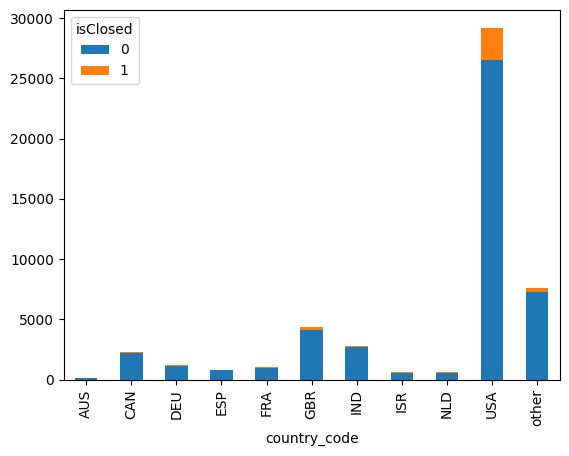

In [ ]:
# Visualization of contingency table with stacked bar plots for country code and isClosed
pd.crosstab(df_company["country_code"],df_company["isClosed"]).plot(kind = "bar", stacked = True)

#### 2) c) Bivariate analysis/Categorical - Numerical relationships

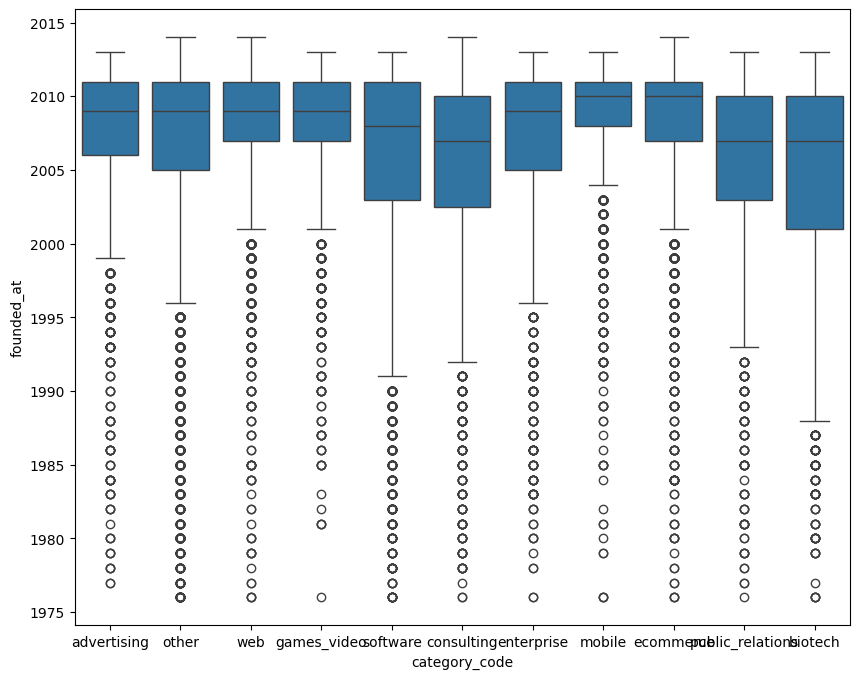

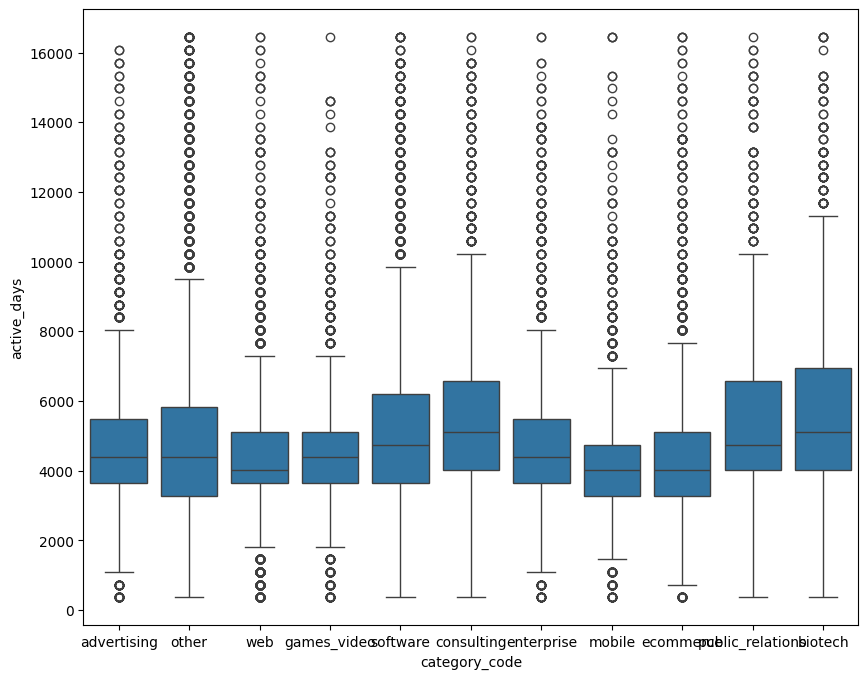

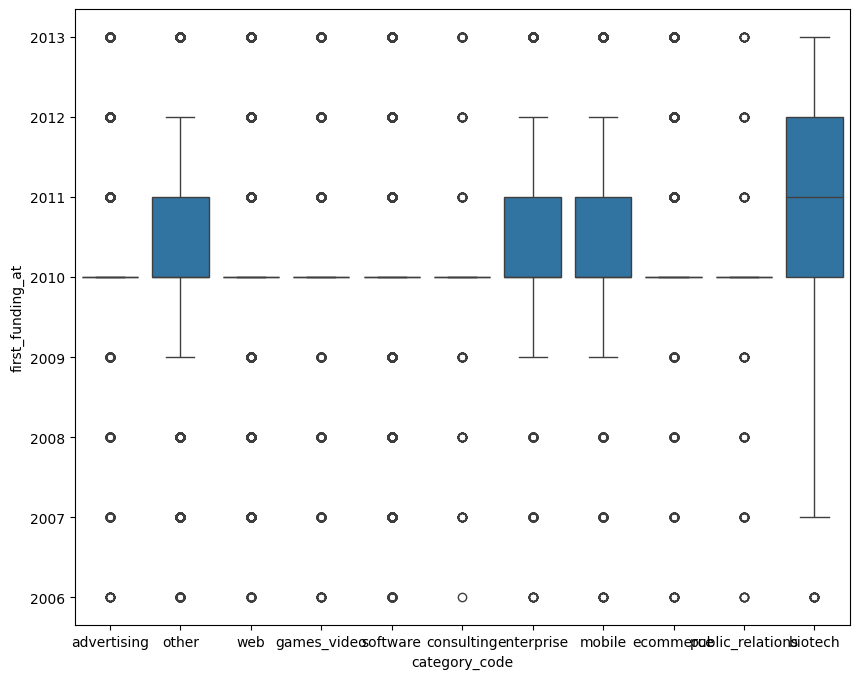

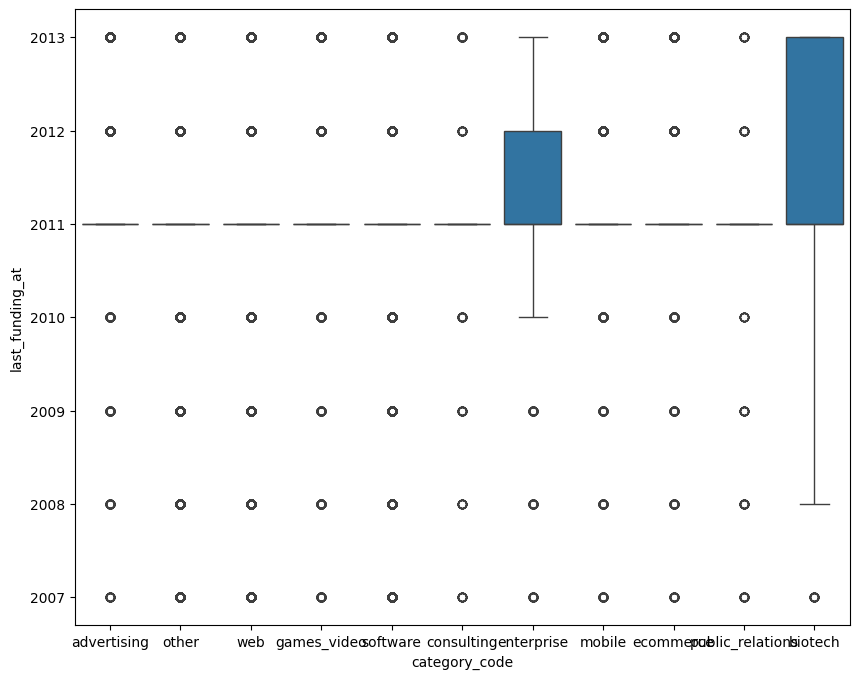

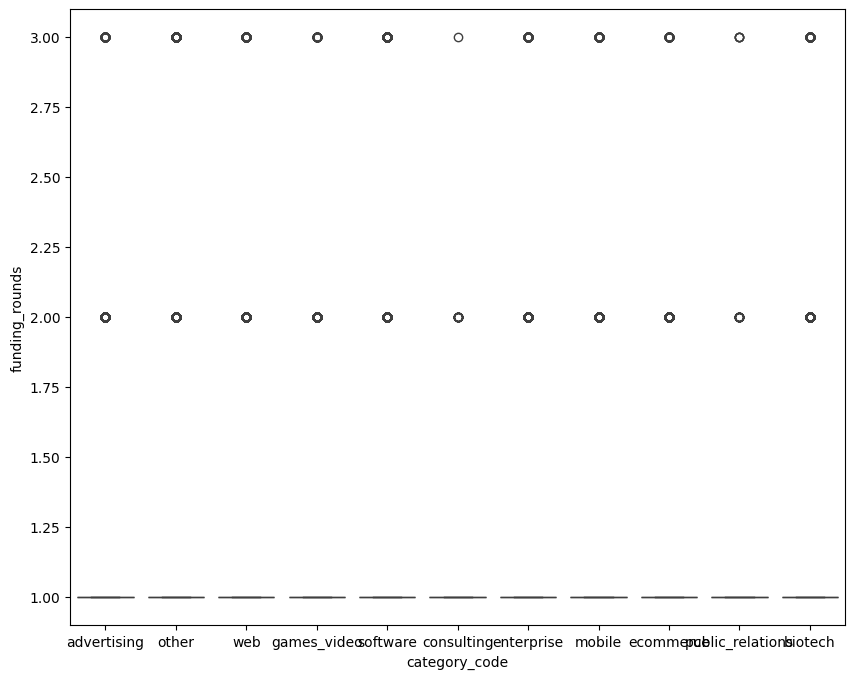

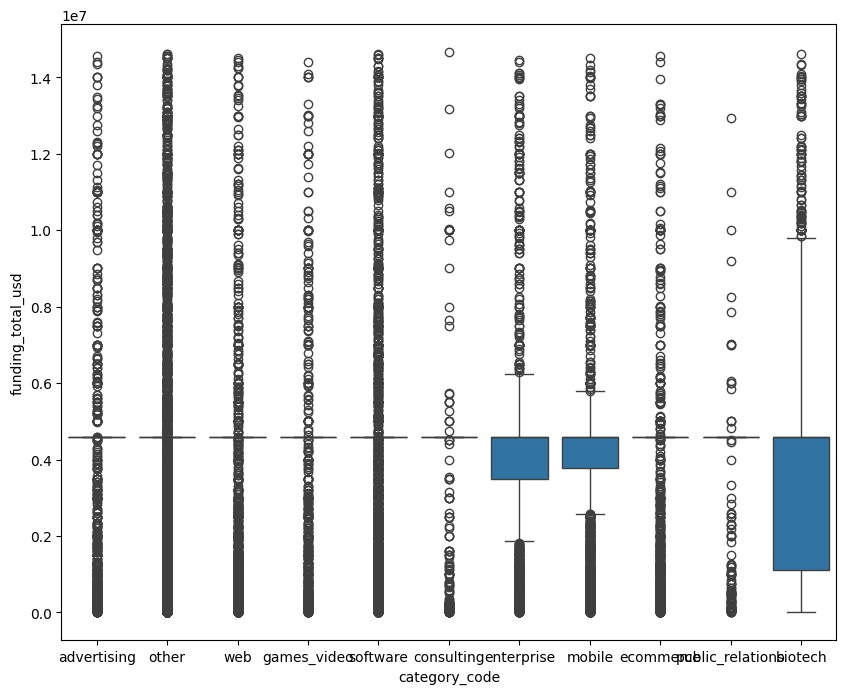

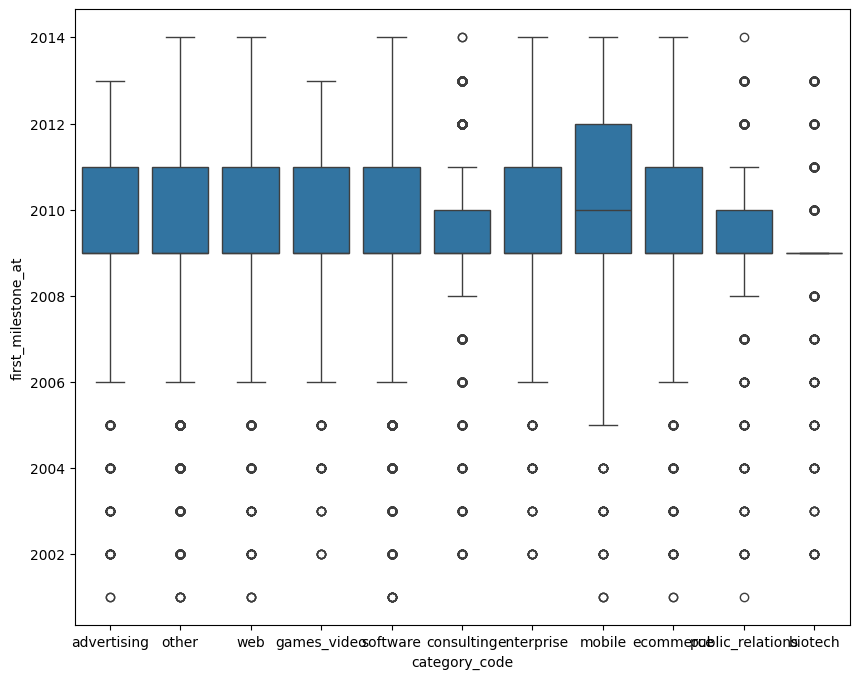

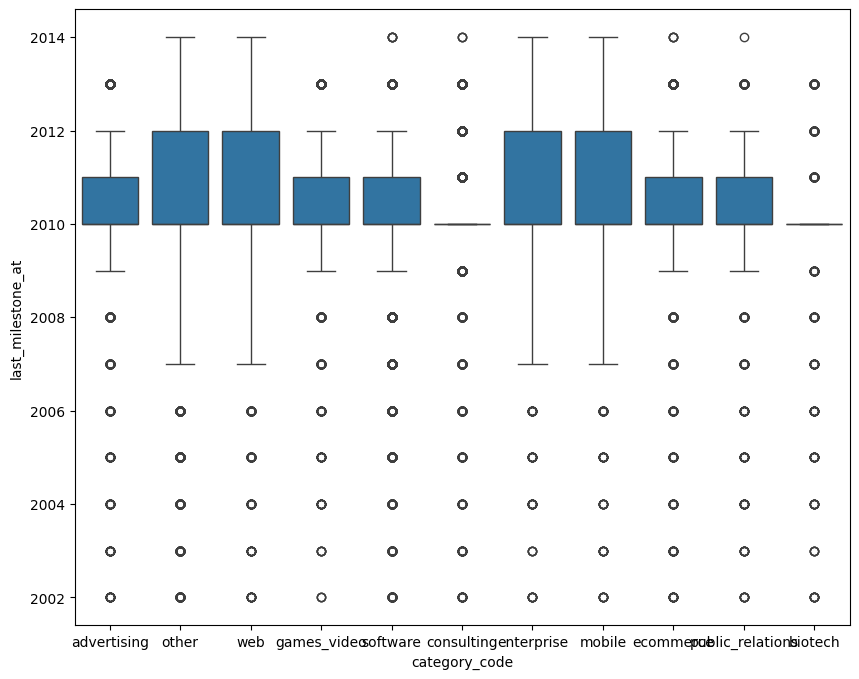

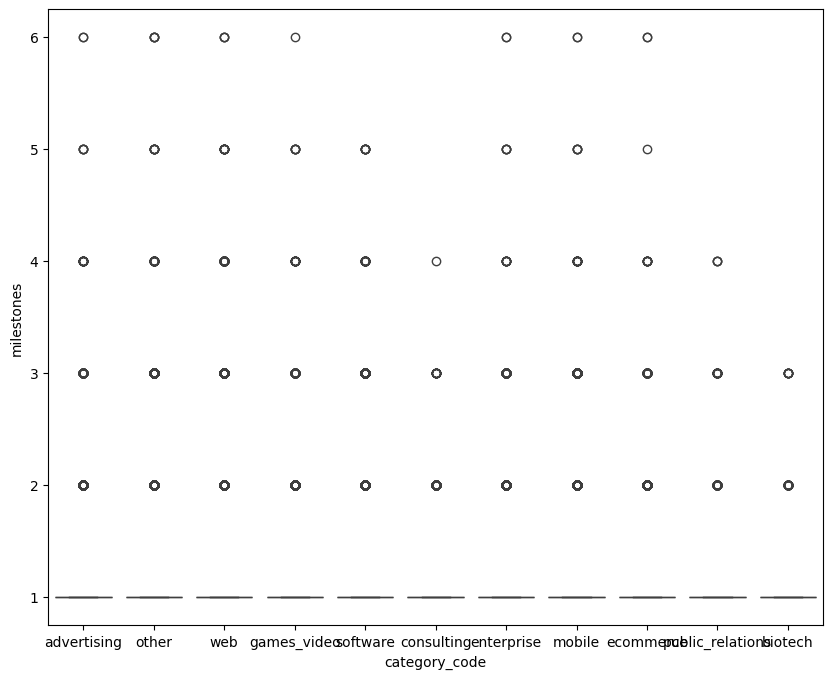

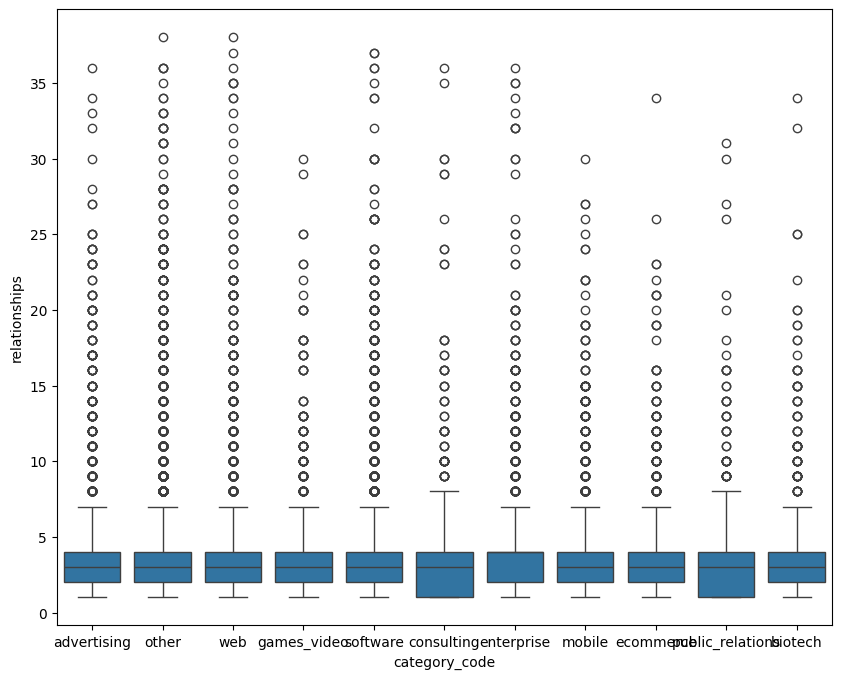

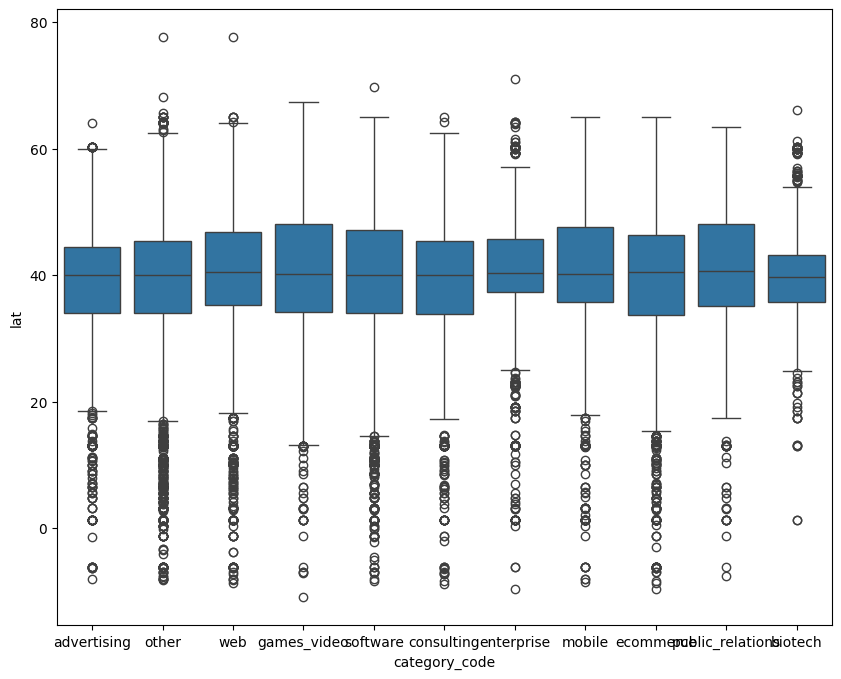

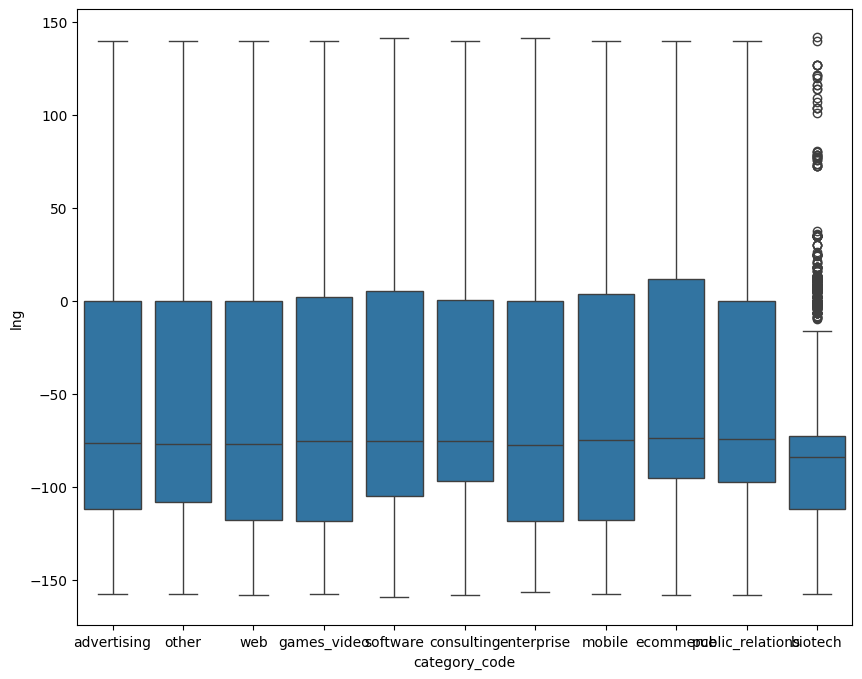

In [ ]:
# Category code with numerical features
for col in num_feat:
    plt.figure(figsize = (10,8))
    sns.boxplot(data = df_company, x = "category_code", y = col)

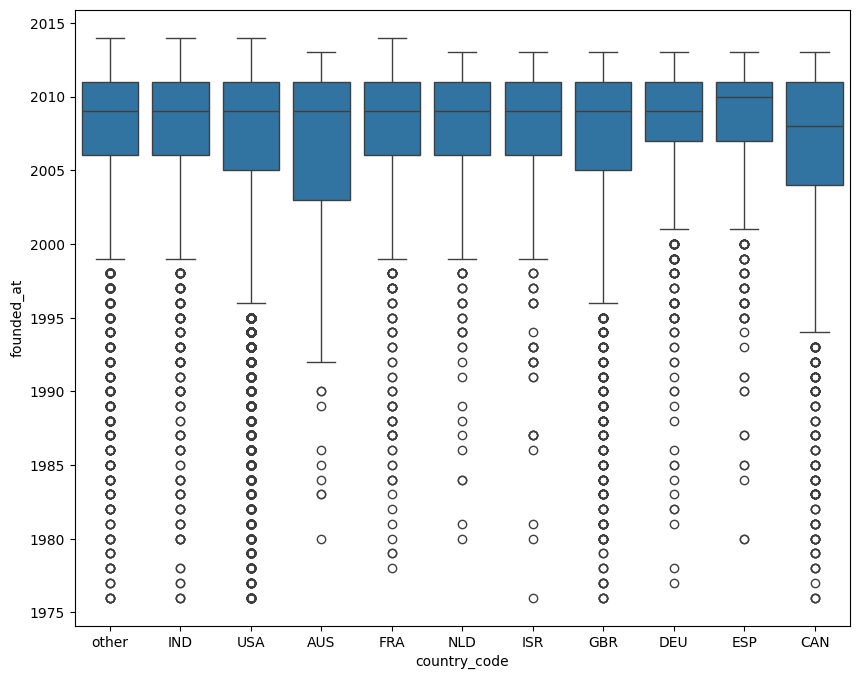

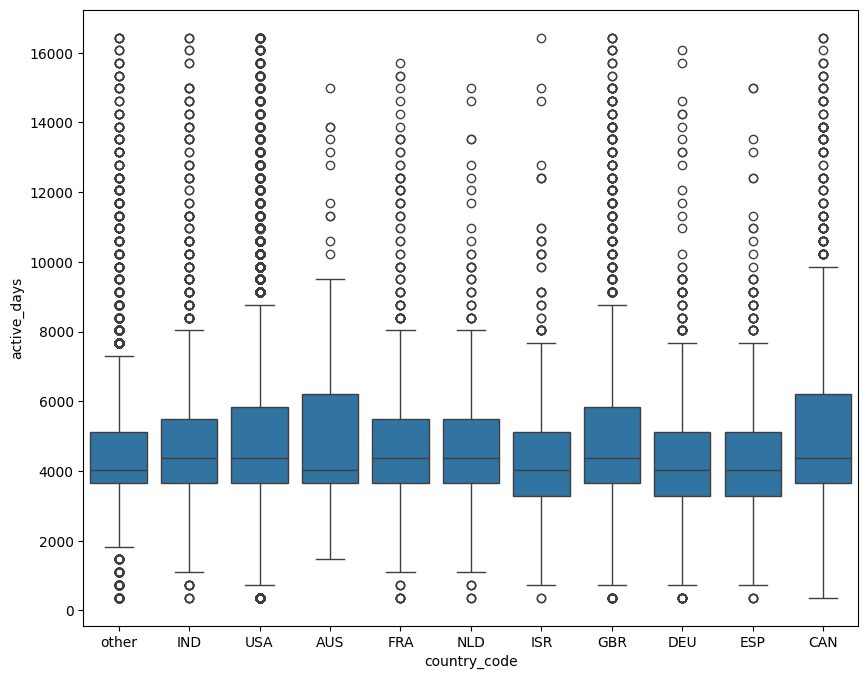

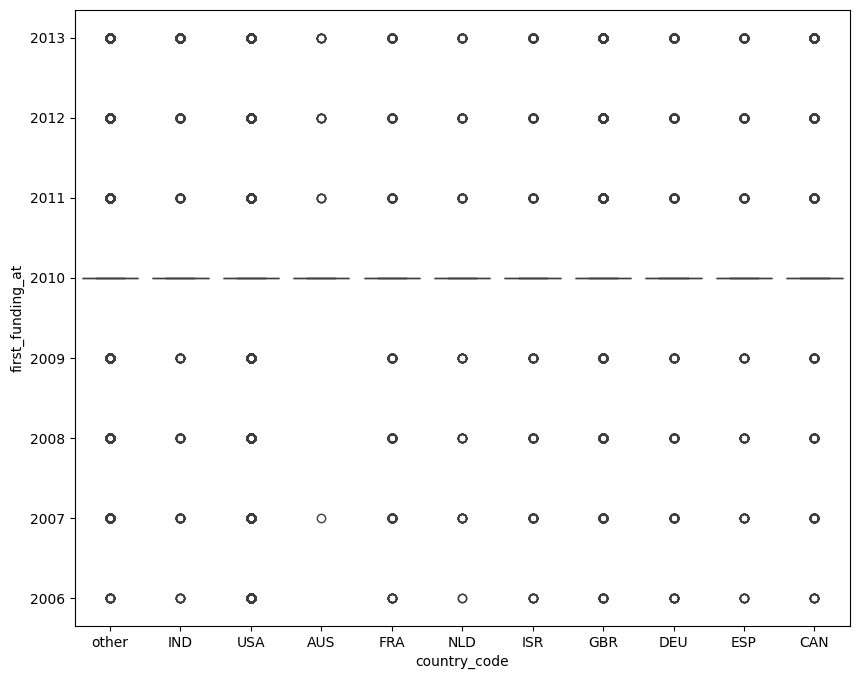

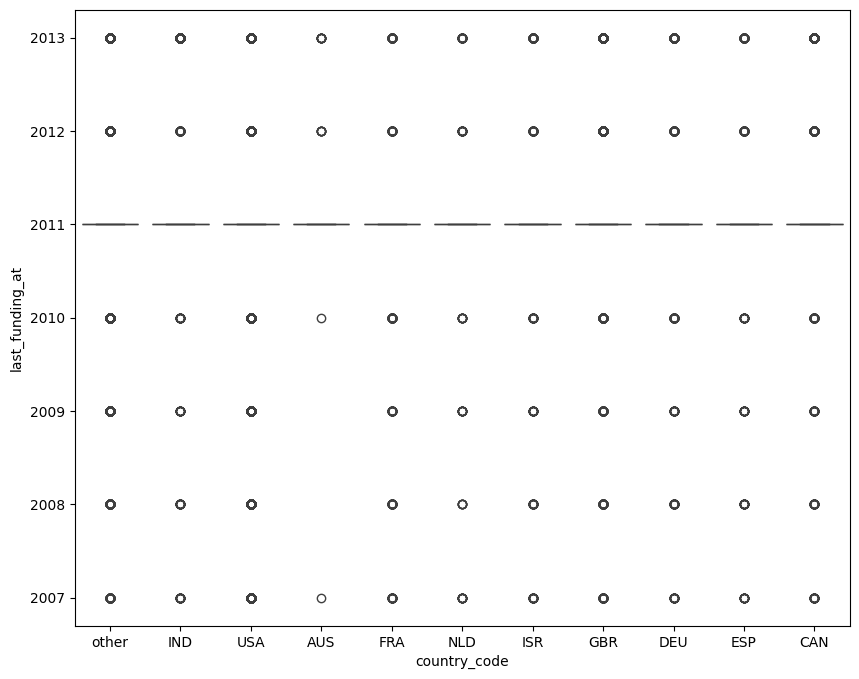

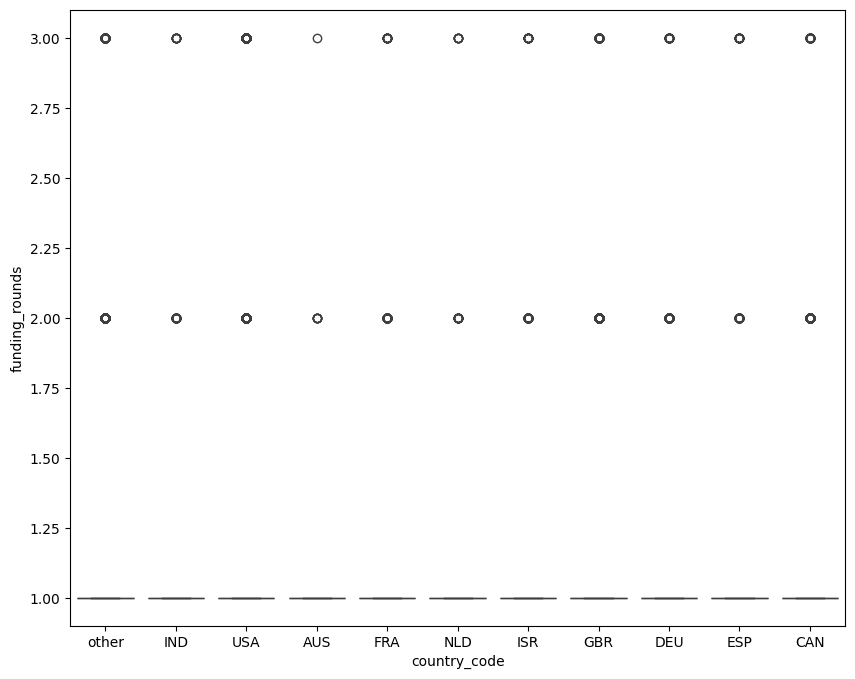

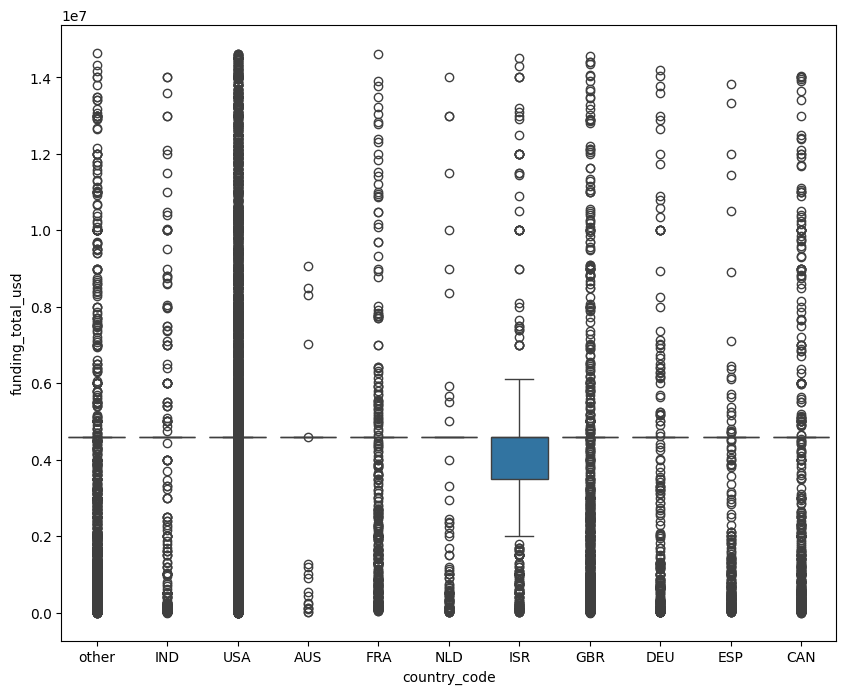

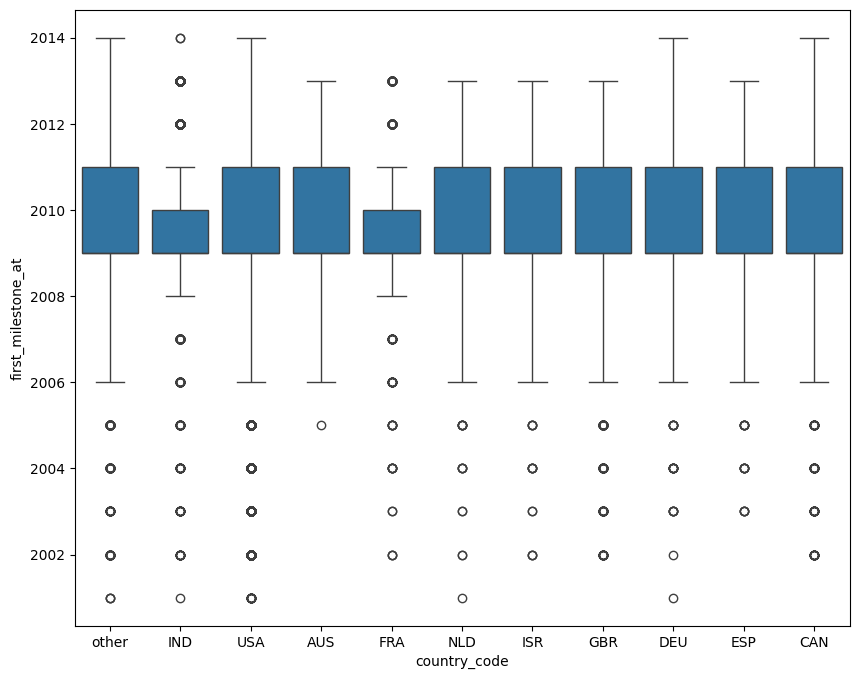

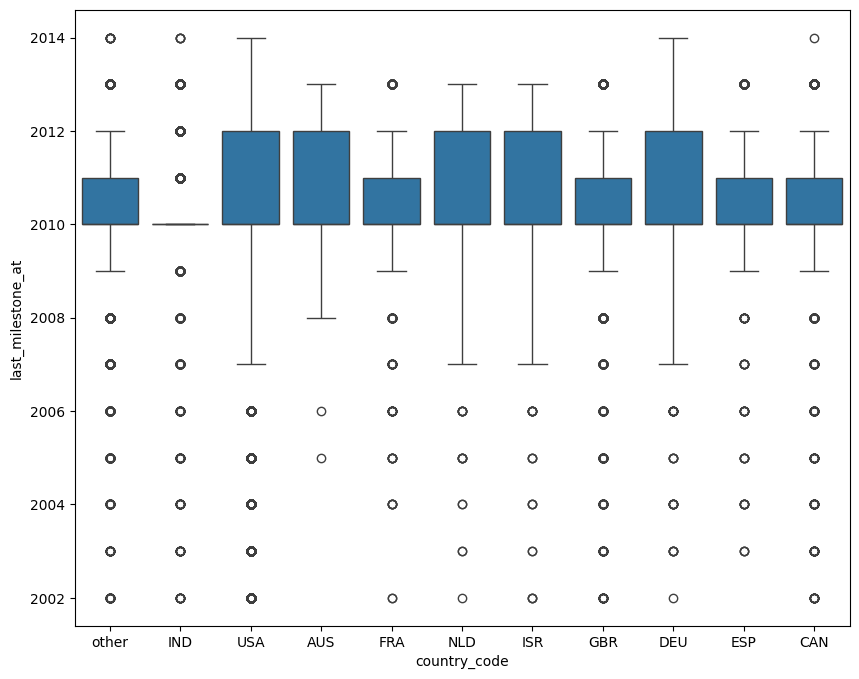

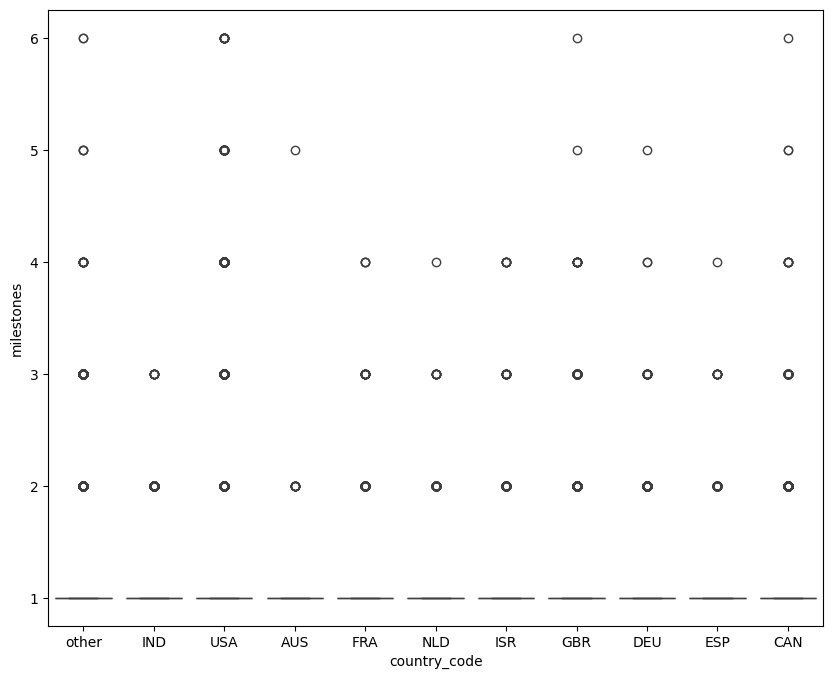

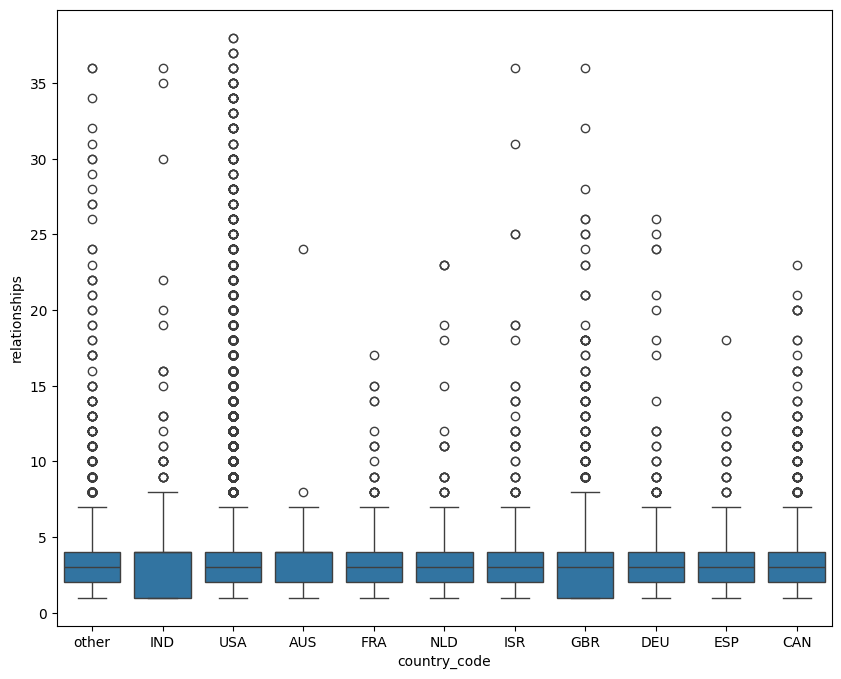

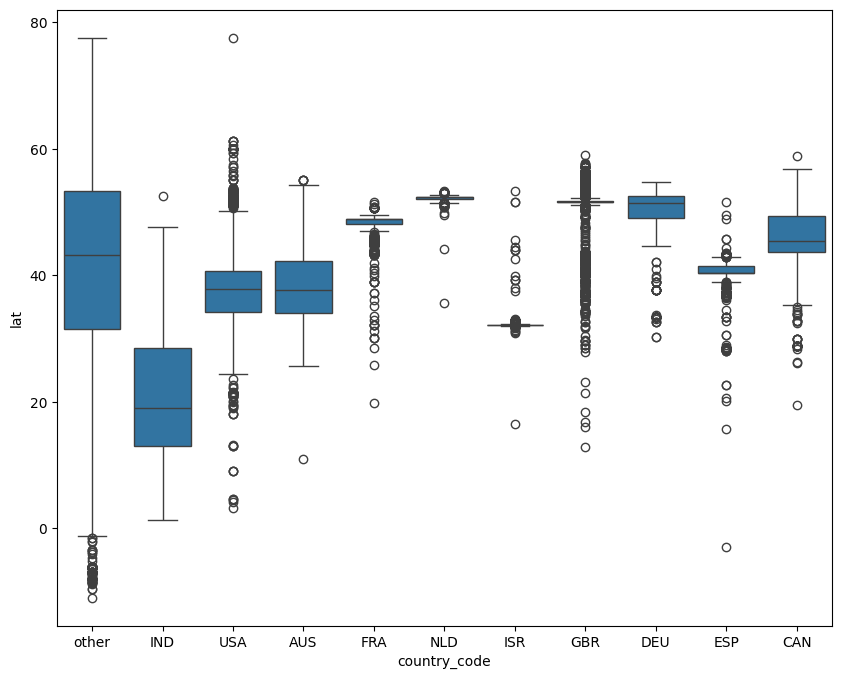

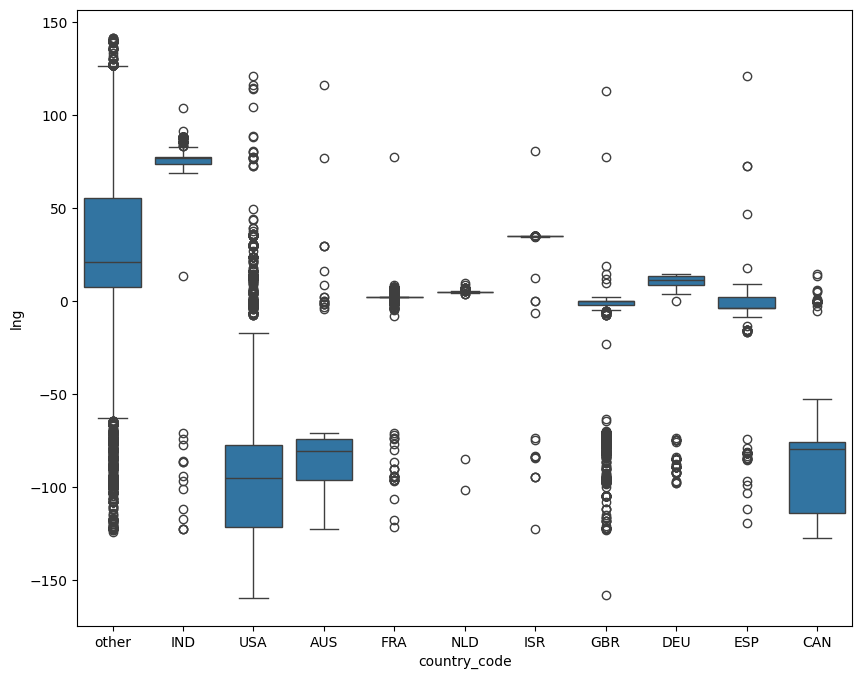

In [ ]:
# Country code with numerical features
for col in num_feat:
    plt.figure(figsize = (10,8))
    sns.boxplot(data = df_company, x = "country_code", y = col)

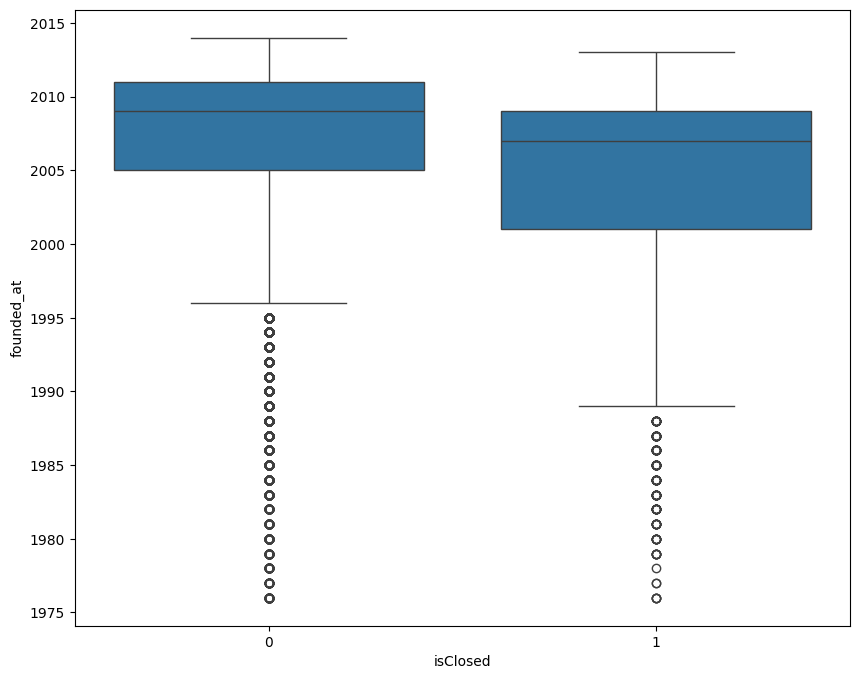

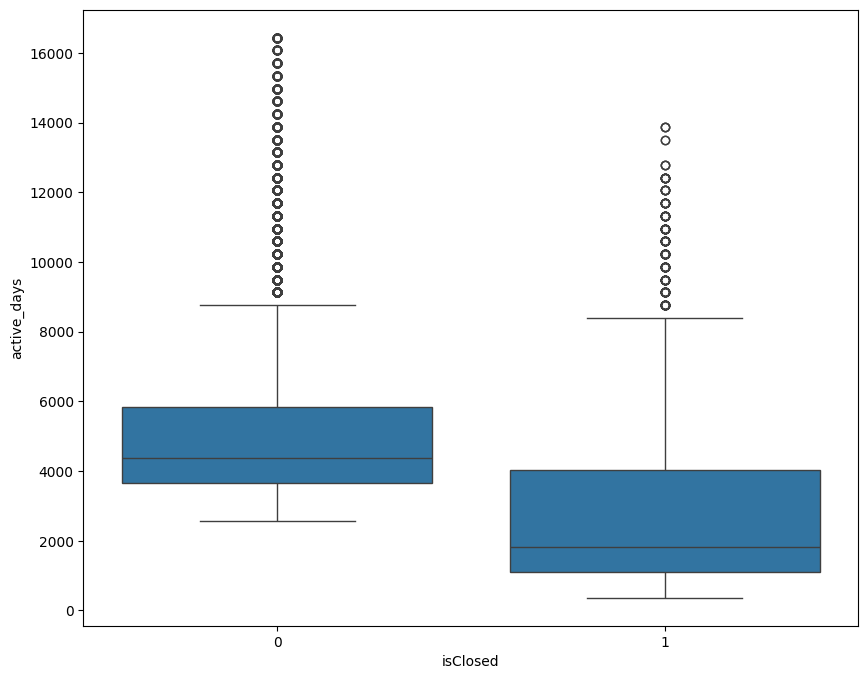

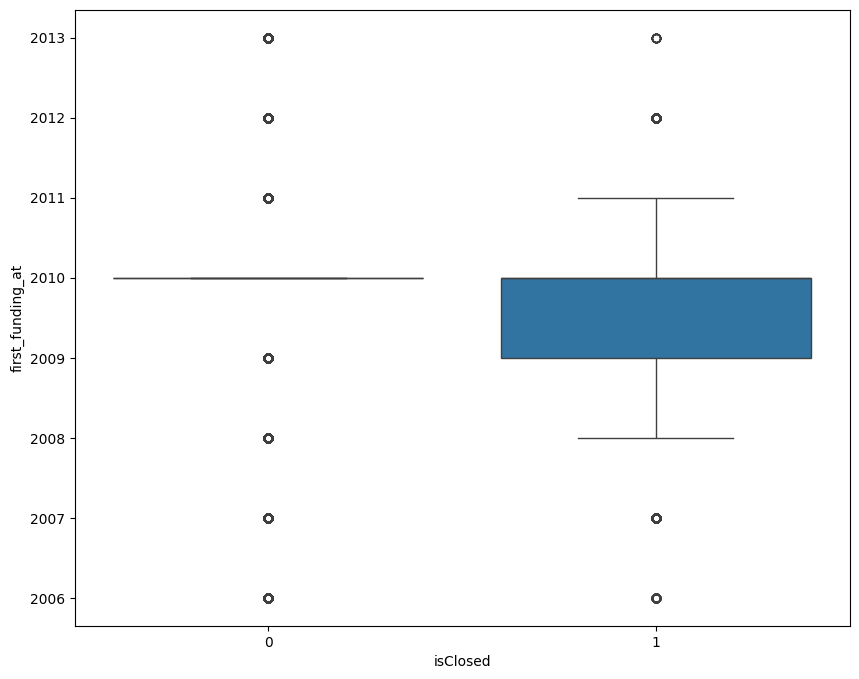

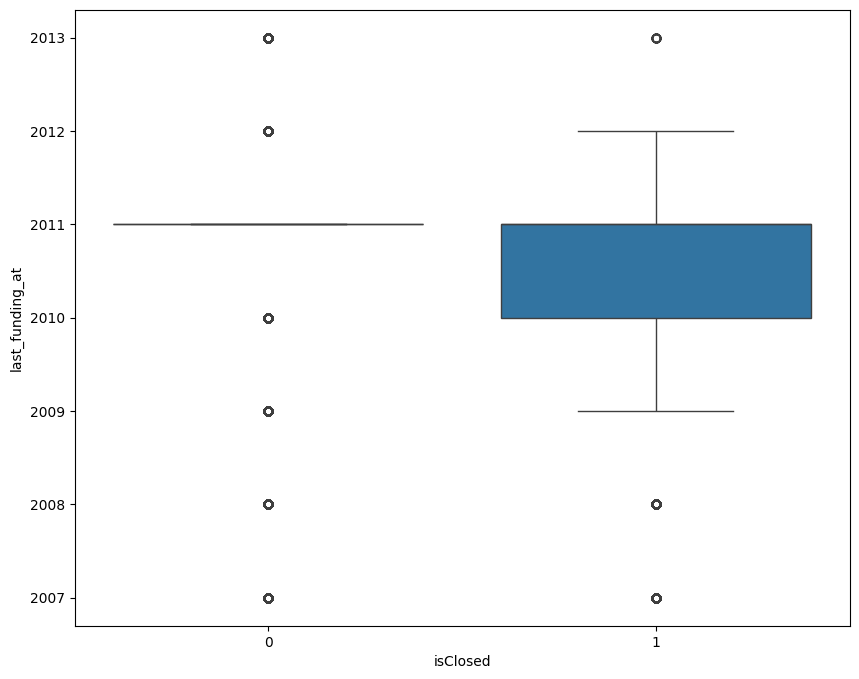

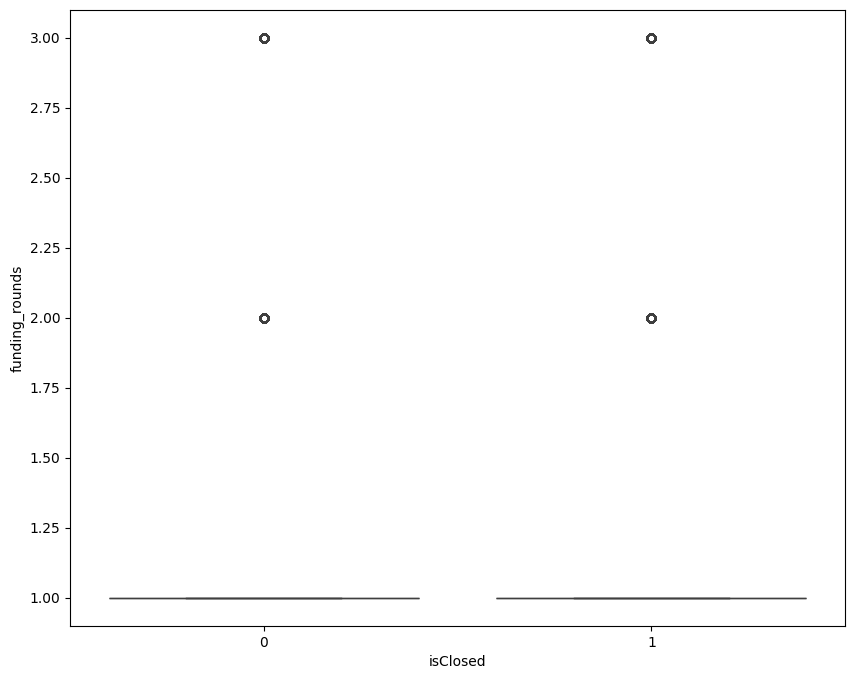

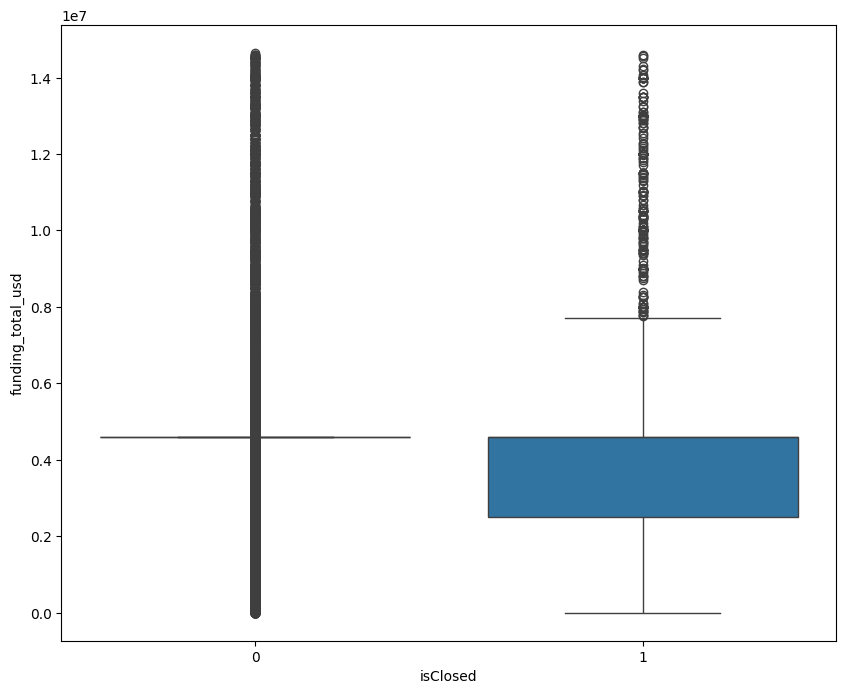

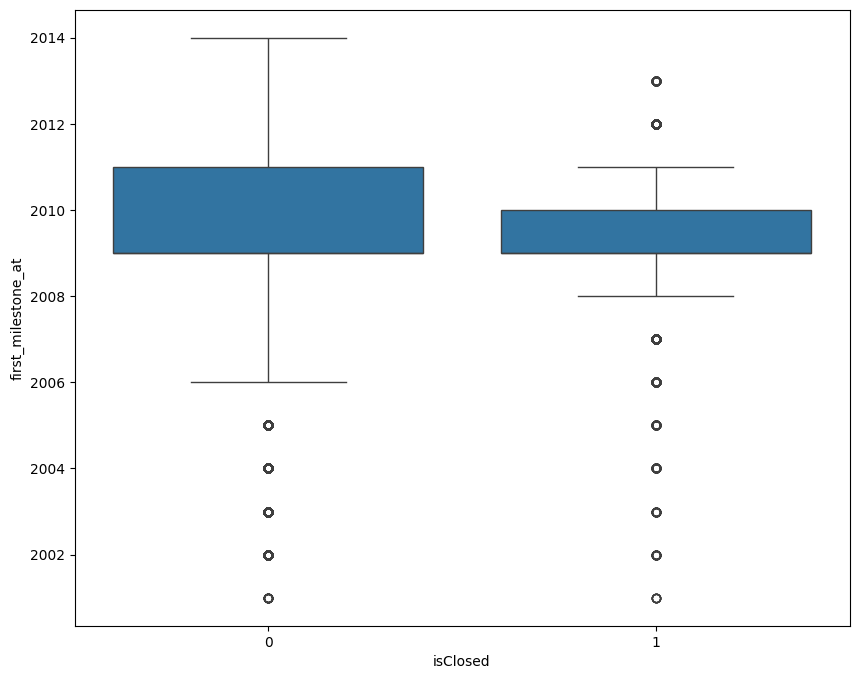

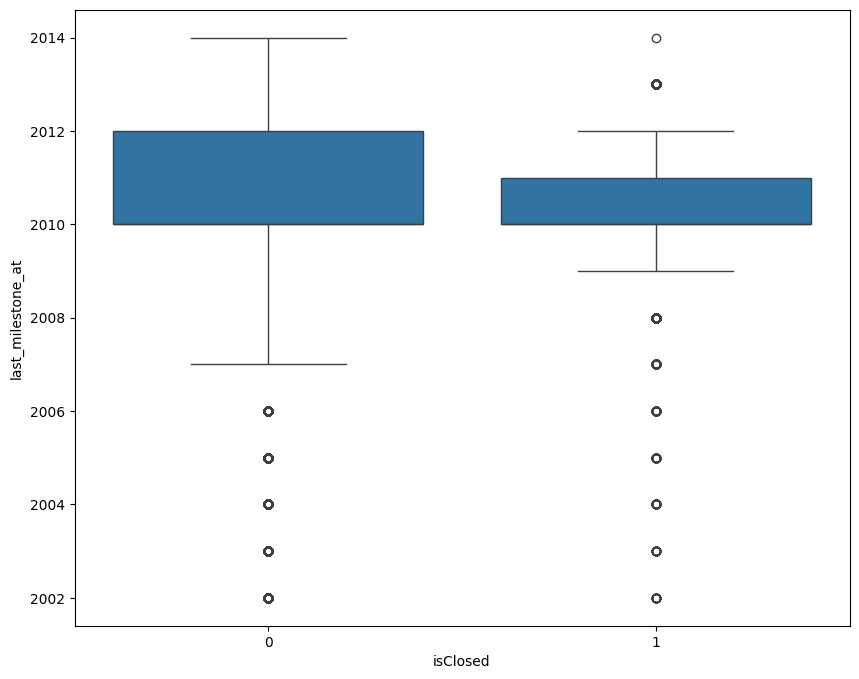

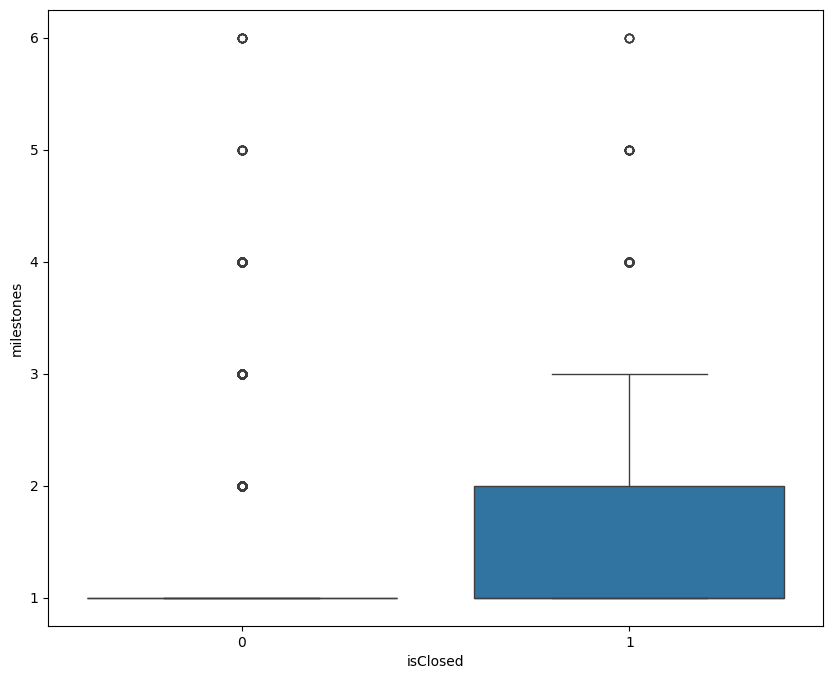

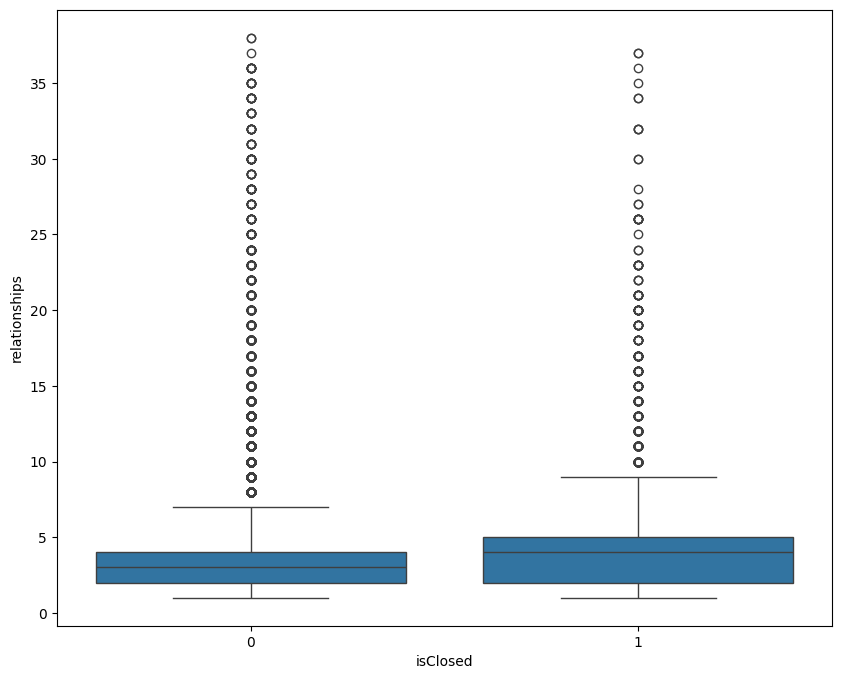

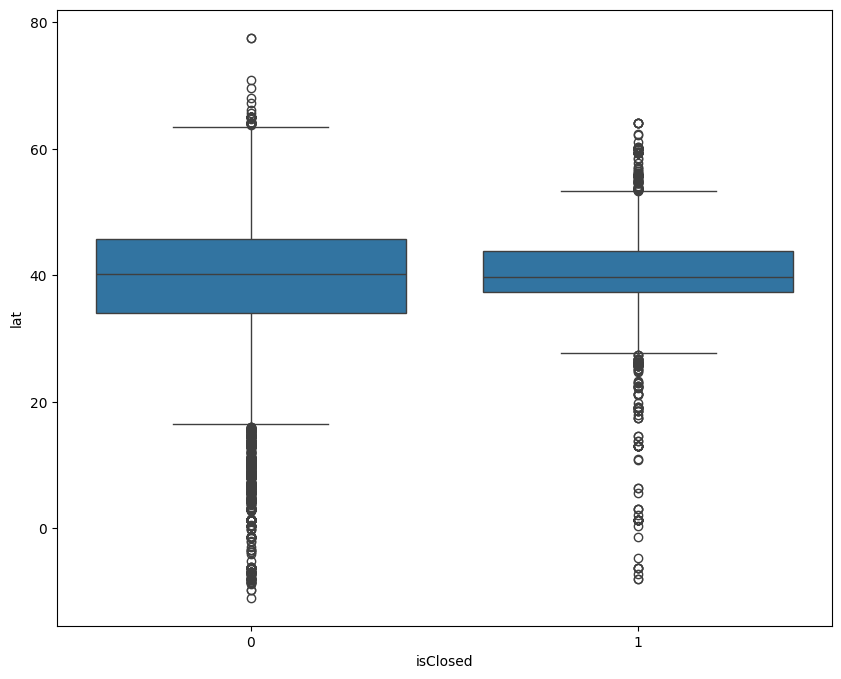

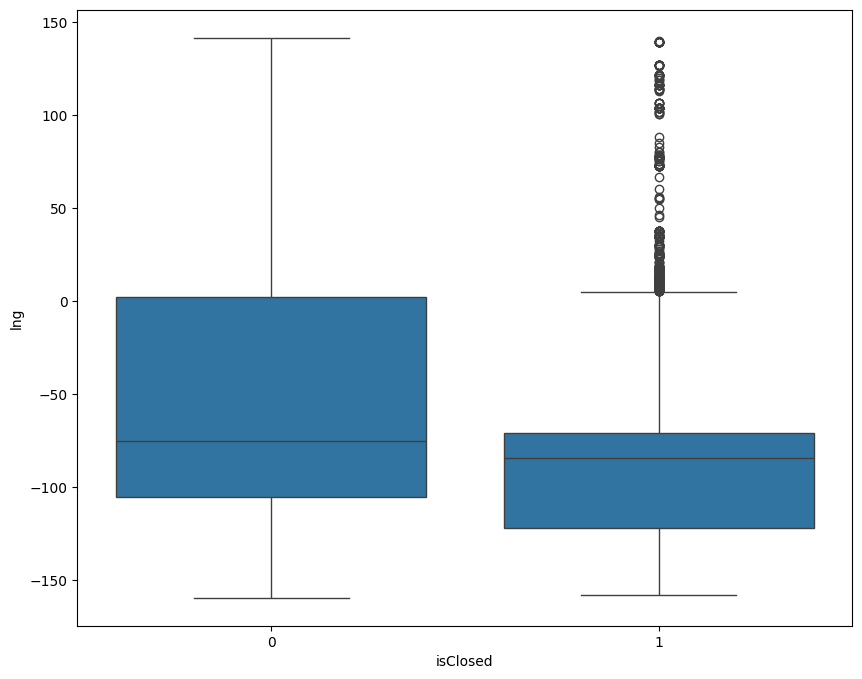

In [ ]:
# Is closed with numerical features
for col in num_feat:
    plt.figure(figsize = (10,8))
    sns.boxplot(data = df_company, x = "isClosed", y = col)

## 3) Multivariate analysis/ PCA

In [ ]:
# Standardisation of numerical features
scaler = StandardScaler().set_output(transform = "pandas")
scaled_feat = scaler.fit_transform(df_company[num_feat])
scaled_feat

founded_at  active_days  first_funding_at  last_funding_at  \
0        0.025065     0.078022         -0.231331        -0.094454   
1        0.187793    -0.080112         -0.231331        -0.094454   
2        0.187793    -0.080112         -0.231331        -0.094454   
3        0.025065    -1.187915         -2.021422        -3.126182   
4        0.187793    -0.080112         -0.231331        -0.094454   
...           ...          ...               ...              ...   
57652   -0.463119     0.552856         -0.231331        -0.094454   
57653    0.025065     0.078022         -0.231331        -0.094454   
57654    0.025065     0.078022         -2.021422        -3.126182   
57656    0.187793    -0.080112         -0.231331        -0.094454   
57657    0.025065     0.078022         -2.021422        -3.126182   

       funding_rounds  funding_total_usd  first_milestone_at  \
0           -0.303595           0.251057           -0.357530   
1           -0.303595           0.251057           -0.357530   
2           -0.303595           0.251057           -0.891945   
3           -0.303595           0.464109           -0.891945   
4           -0.303595           0.251057           -0.891945   
...               ...                ...                 ...   
57652       -0.303595           0.251057           -0.357530   
57653       -0.303595           0.251057            1.780134   
57654       -0.303595          -1.731222            1.780134   
57656       -0.303595           0.251057           -0.357530   
57657       -0.303595          -1.873273           -1.960777   

       last_milestone_at  milestones  relationships       lat       lng  
0              -0.221262   -0.367859      -0.498401 -0.882263  0.619671  
1              -0.221262   -0.367859       0.169470 -1.672916  1.849118  
2              -1.366678   -0.367859      -0.498401 -0.370205 -0.811177  
3               0.924155    3.693189       3.508825 -0.204776 -1.050980  
4              -1.366678   -0.367859      -0.164465 -0.624161 -0.969562  
...                  ...         ...            ...       ...       ...  
57652          -0.221262   -0.367859       0.169470  0.122590 -0.341634  
57653           1.496864    1.662665       0.503406 -0.166914 -1.055963  
57654           1.496864   -0.367859       3.508825 -0.209435 -1.048046  
57656          -0.221262   -0.367859      -0.832336 -0.529370 -0.993945  
57657          -1.366678    1.662665      -0.832336 -0.530986 -0.997983  

[50639 rows x 12 columns]

In [ ]:
# Dimentionality reduction with PCA to conserve 80% of variance
pca = PCA(n_components=0.8).set_output(transform = "pandas")
pca_components = pca.fit_transform(scaled_feat)
pca_components

pca0      pca1      pca2      pca3      pca4      pca5      pca6
0     -0.543702 -0.679511 -0.298404 -0.550874 -0.832232 -0.102422 -0.151634
1     -0.423570 -0.654648 -0.564756 -1.122455 -2.024125 -0.357572  0.526358
2     -1.110161 -1.019647 -0.143307  0.918593 -0.117471 -0.222451 -0.833725
3     -0.836846  4.502570 -3.095608  1.389974  0.155062 -2.457550  0.675375
4     -1.100584 -0.842429 -0.093290  0.951206 -0.262337 -0.452411 -0.995196
...         ...       ...       ...       ...       ...       ...       ...
57652 -0.891306  0.090583  0.343469 -0.082514  0.269424  0.096818 -0.300959
57653  1.439451  2.152345 -0.243981 -0.689183  0.695088 -0.608073 -0.748844
57654 -0.042066  3.141815 -2.218483 -1.280105  1.840534 -2.370960 -0.149918
57656 -0.392780 -0.651193 -0.231343  0.256559  0.142349 -0.220726 -1.245719
57657 -2.746746  0.005392 -2.444726  1.529052  0.991180 -2.948779  0.453541

[50639 rows x 7 columns]

In [ ]:
# Displaying variance ratio explained by each component
pca.explained_variance_ratio_

array([0.23569725, 0.1520341 , 0.13820251, 0.09654431, 0.08831931,
       0.07846736, 0.07255896])

In [ ]:
# Displaying total of variance ratio explained by each component
np.sum(pca.explained_variance_ratio_)

0.8618238076157353

In [36]:
# Saving principal components
pca_components.to_csv("pca_components.csv", index = False)

In [37]:
#Finally Saving explored Data.
df_company.to_csv("company_explored_df.csv", index = False)